# Zomato Restaurant

### Project Description

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.


Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:
• Country code
• Country name


# Dataset Link-  
•	https://github.com/dsrscientist/dataset4/blob/main/Country-Code.xlsx
•	https://github.com/dsrscientist/dataset4/blob/main/zomato.csv



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv',encoding='latin-1')

# Lets read the first five rows of our data set.

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Lets check the last five rows of our dataset

In [4]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [5]:
df.shape

(9551, 21)

Dataset has 9551 rows and 21 columns

# Combining Country Code with the original dataset

In [6]:
df2=pd.read_excel(r'C:\Users\user\Desktop\Country-Code.xlsx')


In [7]:
df2

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [8]:
data = pd.merge (df,df2, on = 'Country Code')
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [9]:
data.shape

(9551, 22)

The dataset contains the detalis of Zomato Resaurant. This dataset is comprised of 22 columns including two target variables Average Cost for two and Price range , where we need to predict both 'Average Cost for two' and 'Price range'.So we have a total of 9551 rows and 22 columns.

In [10]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [12]:
data.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

# Dropping Irrelavent Features

In [13]:
data.drop(["Restaurant ID", 'Switch to order menu'], axis=1, inplace= True)
data.shape

(9551, 20)

In [14]:
data.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

In [15]:
data.isnull().sum()

Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

# Checking duplicate

In [16]:
data.duplicated().sum()

0

The dataset is free from duplicates

# Let check if any whitespace, 'NA', '?' or '-' exist in dataset

In [17]:
data.isin([' ','NA','-']).sum().any()

False

In [18]:
data.isin(['?']).sum().any()

False

###### Dataset is free from ' ', 'NA' ,'-', '?'

# Checking Null

In [19]:
null_val= data.isna().sum()
null_val_per =(null_val/data.shape[0])*100
l= [null_val, null_val_per]
print("missing value details \n\n", pd.concat(l, axis =1, keys =['Null Values', 'Null Values %']).sort_values('Null Values'))

missing value details 

                       Null Values  Null Values %
Restaurant Name                 0       0.000000
Rating text                     0       0.000000
Rating color                    0       0.000000
Aggregate rating                0       0.000000
Price range                     0       0.000000
Is delivering now               0       0.000000
Has Online delivery             0       0.000000
Has Table booking               0       0.000000
Currency                        0       0.000000
Average Cost for two            0       0.000000
Latitude                        0       0.000000
Longitude                       0       0.000000
Locality Verbose                0       0.000000
Locality                        0       0.000000
Address                         0       0.000000
City                            0       0.000000
Country Code                    0       0.000000
Votes                           0       0.000000
Country                         0       0.00

## No missing values in our dataset

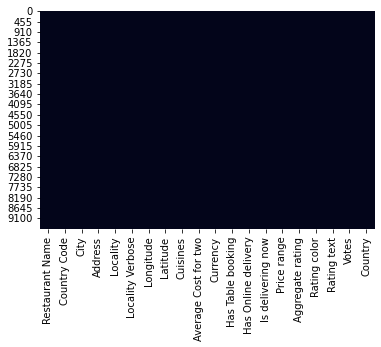

In [20]:
sns.heatmap(data.isnull(),cbar=False)
plt.show()

Null values are present in the total dataset.
The feature containing missing values are categorical in nature. Let's impute them with mode of that particular category.

# Missing value imputation

In [21]:
data['Cuisines'].mode()

0    North Indian
Name: Cuisines, dtype: object

In [22]:
data['Cuisines'].fillna(data['Cuisines'].mode()[0],inplace=True)

###### All missing value is imputed

# Descriptive Statistics

In [23]:
data.describe()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [24]:
data.describe(include=object).T

,count,unique,top,freq
Restaurant Name,9551,7446,Cafe Coffee Day,83
City,9551,141,New Delhi,5473
Address,9551,8918,"Sector 41, Noida",11
Locality,9551,1208,Connaught Place,122
Locality Verbose,9551,1265,"Connaught Place, New Delhi",122
Cuisines,9551,1825,North Indian,945
Currency,9551,12,Indian Rupees(Rs.),8652
Has Table booking,9551,2,No,8393
Has Online delivery,9551,2,No,7100
Is delivering now,9551,2,No,9517


Outliers are present in numarical dataset.

Seems price range is discrete numarical data.

Seems price range is discrete numarical data.

Average_Cost_for_two is a numarical data(target1).

Price_range is a numarical data(target1).

# Differentiate Numarical and Categorical Data

In [25]:
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['Country Code', 'Average Cost for two', 'Price range', 'Votes'], float64: ['Longitude', 'Latitude', 'Aggregate rating'], object: ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating color', 'Rating text', 'Country']}

In [26]:
num_col= ['Country_Code', 'Average_Cost_for_two', 'Price_range', 'Votes', 'Longitude', 'Latitude', 'Aggregate_rating']

cat_col= ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality_Verbose', 'Cuisines', 'Currency', 
               'Has Table booking', 'Has Online delivery', 'Is_delivering_now', 'Rating color', 'Rating text']

# Exploratory Data Analysis(EDA)

### Univariate Analysis (Categorical and Numarical Data Analysis)

In [27]:
data['Currency'].value_counts()

Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(£)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64

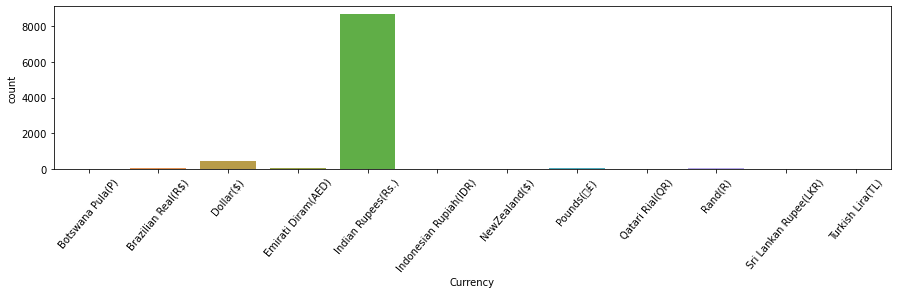

In [28]:
plt.figure(figsize=(15,3))
sns.countplot(data["Currency"])
plt.xticks(rotation=50)
plt.show()

Among 9551, 8652 is Indian Rupees(Rs.).
Max is indian rupees.

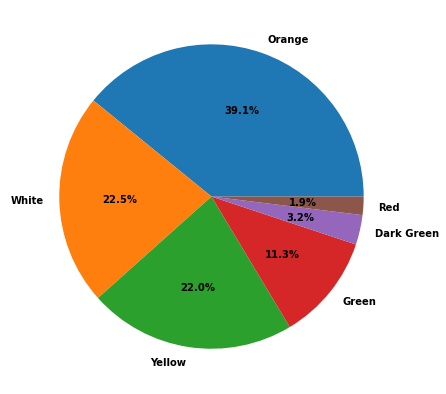

In [29]:
plt.subplots(figsize=(10,7))
data['Rating color'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10})
plt.ylabel( ' ')
plt.show()

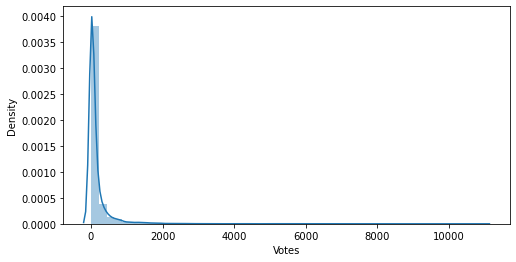

In [30]:
plt.figure(figsize=(8,4))
sns.distplot(data['Votes'])
plt.show()

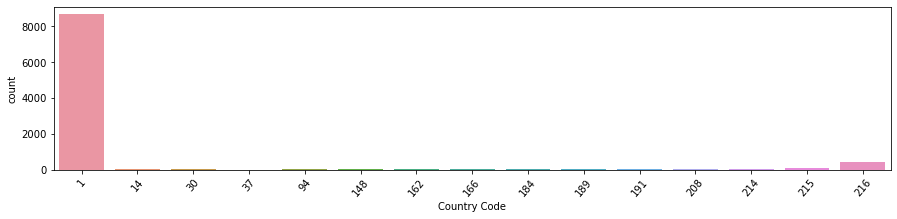

In [31]:
plt.figure(figsize=(15,3))
sns.countplot(data["Country Code"])
plt.xticks(rotation=50)
plt.show()

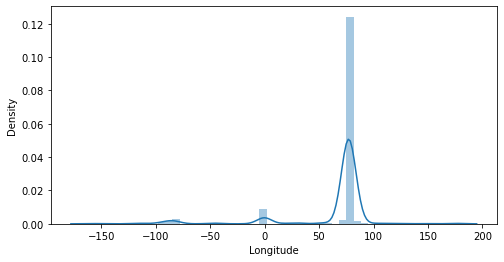

In [32]:
plt.figure(figsize=(8,4))
sns.distplot(data['Longitude'])
plt.show()

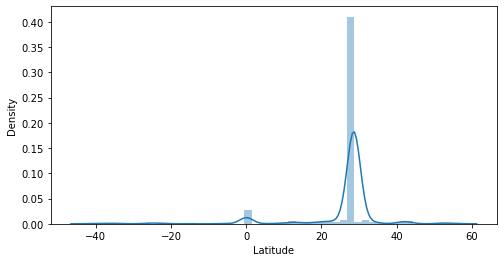

In [33]:
plt.figure(figsize=(8,4))
sns.distplot(data['Latitude'])
plt.show()

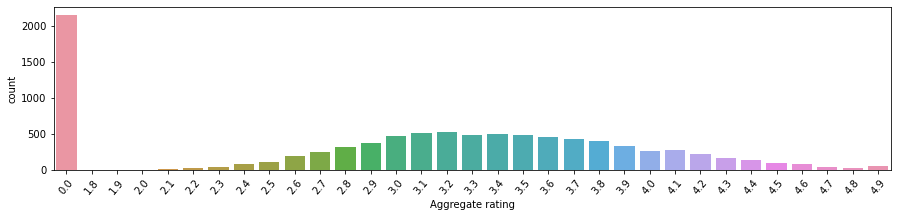

In [34]:
plt.figure(figsize=(15,3))
sns.countplot(data["Aggregate rating"])
plt.xticks(rotation=50)
plt.show()

# Target Variable Exploration

## Average_Cost_for_two

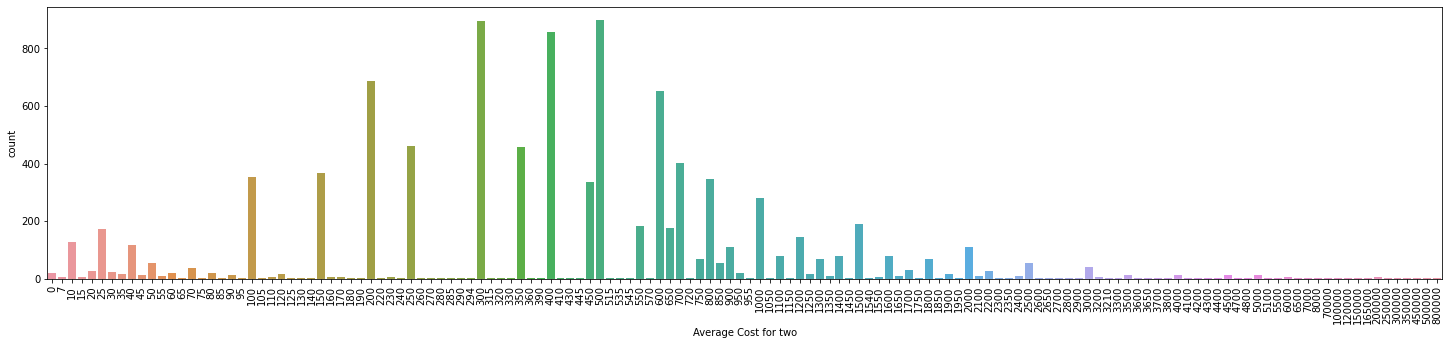

In [35]:
plt.figure(figsize=(25,5))
sns.countplot(data["Average Cost for two"])
plt.xticks(rotation=90)
plt.show()

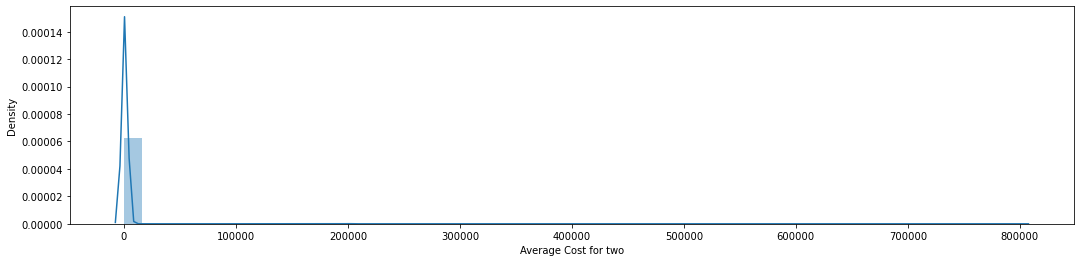

In [36]:
plt.figure(figsize=(18,4))
sns.distplot(data['Average Cost for two'])
plt.show()

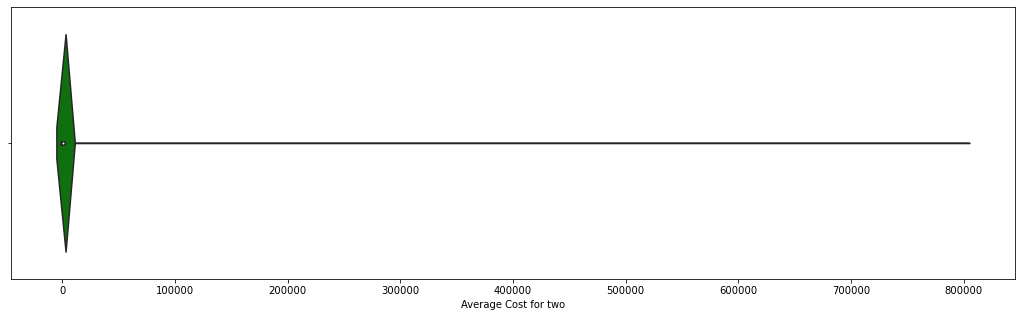

In [37]:
plt.figure(figsize=(18,5))
sns.violinplot(data['Average Cost for two'], color='green')
plt.show()

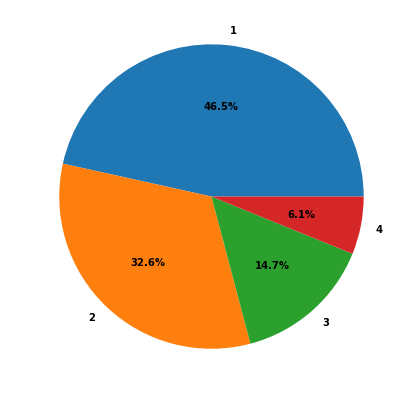

In [38]:
plt.subplots(figsize=(8,7))
data['Price range'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10})
plt.ylabel( ' ')
plt.show()

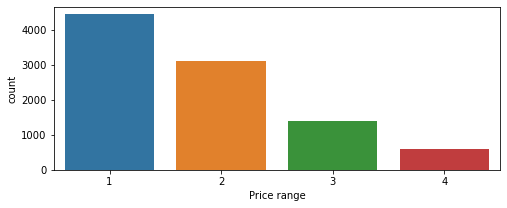

In [39]:
plt.figure(figsize=(8,3))
sns.countplot(data["Price range"])
plt.show()

Maximum Price_range is 1(around 47%).
Price_range is a discrete numarical data.Needs classification model to predict this.

## Bivariate Analysis:

### Relation with two target variable, Price_range and Average_Cost_for_two

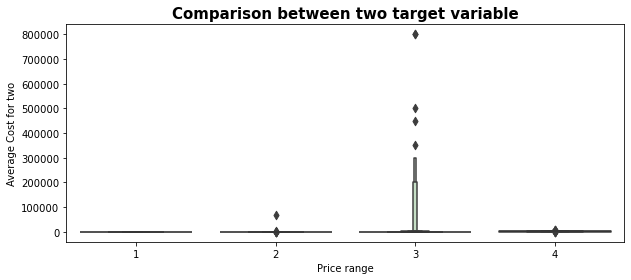

In [40]:
plt.figure(figsize=(10,4))
sns.boxenplot(y = "Average Cost for two", x= "Price range", data = data)
plt.title('Comparison between two target variable', fontsize=15, fontweight='bold')
plt.show()


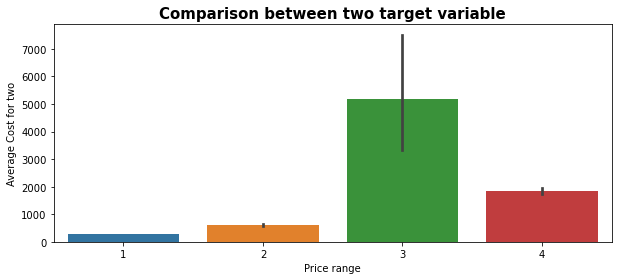

In [41]:
plt.figure(figsize=(10,4))
sns.barplot(y = "Average Cost for two", x= "Price range", data = data)
plt.title('Comparison between two target variable', fontsize=15, fontweight='bold')
plt.show()

For price range 1, Average_Cost_for_two is lowest.
Maximum Average_Cost_for_two is for orice range 3.
Outliers are present.

## Relation with different features and Average_Cost_for_two:

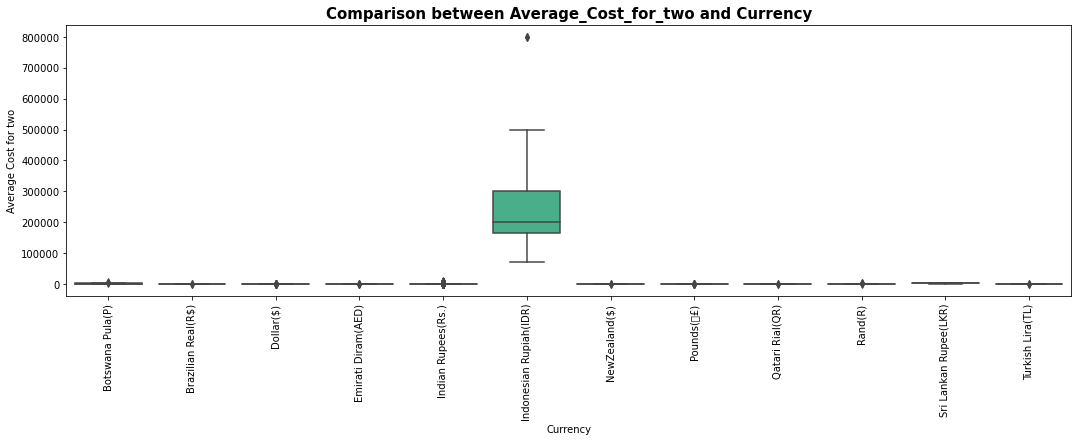

In [42]:
plt.figure(figsize=(18,5))
sns.boxplot(y = "Average Cost for two", x= "Currency", data = data)
plt.title('Comparison between Average_Cost_for_two and Currency', fontsize=15, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

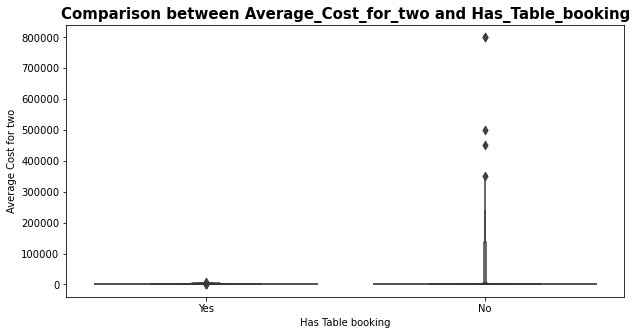

In [43]:
plt.figure(figsize=(10,5))
sns.boxenplot(y = "Average Cost for two", x= "Has Table booking", data = data)
plt.title('Comparison between Average_Cost_for_two and Has_Table_booking', fontsize=15, fontweight='bold')
plt.show()

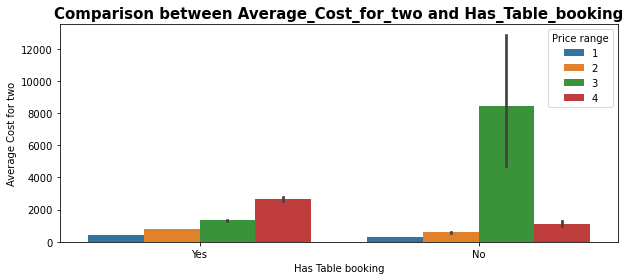

In [44]:
plt.figure(figsize=(10,4))
sns.barplot(y = "Average Cost for two", x= "Has Table booking", data = data, hue= 'Price range')
plt.title('Comparison between Average_Cost_for_two and Has_Table_booking', fontsize=15, fontweight='bold')
plt.show()

1-Maximum Average_Cost_for_two is for IND.

2-Maximum customer have no booking of their table.

3-Interestingly, the restaurant with price range level 4 have maximum table booking. The customers who have decided to go for a high price restaurent, booked their table previously.

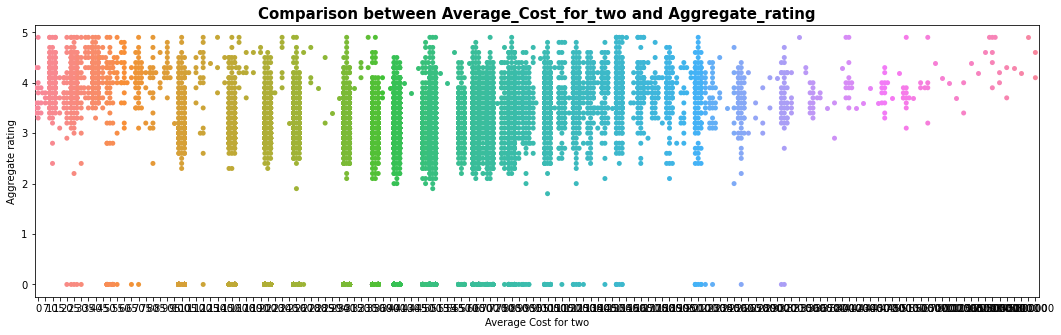

In [45]:
plt.figure(figsize=(18,5))
sns.swarmplot(x = "Average Cost for two", y = "Aggregate rating", data = data)
plt.title('Comparison between Average_Cost_for_two and Aggregate_rating', fontsize=15, fontweight='bold')
plt.show()

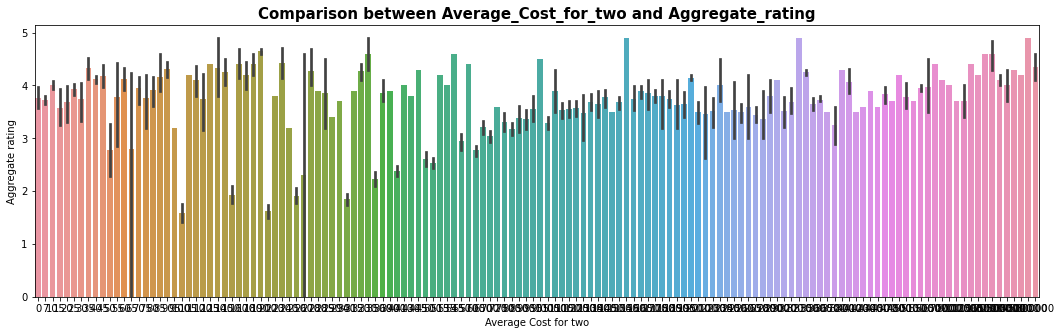

In [46]:
plt.figure(figsize=(18,5))
sns.barplot(x = "Average Cost for two", y = "Aggregate rating", data = data)
plt.title('Comparison between Average_Cost_for_two and Aggregate_rating', fontsize=15, fontweight='bold')
plt.show()

For maximum case, if Average_Cost_for_two increased, Aggregate_rating also increased.

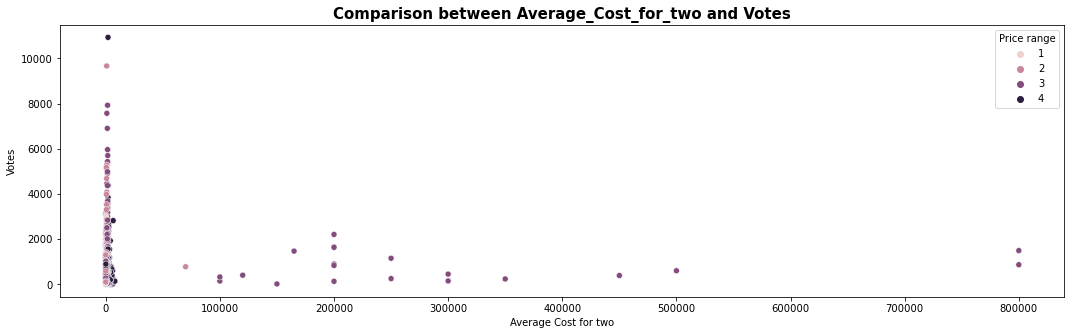

In [47]:
plt.figure(figsize=(18,5))
sns.scatterplot(x = "Average Cost for two", y = "Votes", data = data, hue= 'Price range')
plt.title('Comparison between Average_Cost_for_two and Votes', fontsize=15, fontweight='bold')
plt.show()

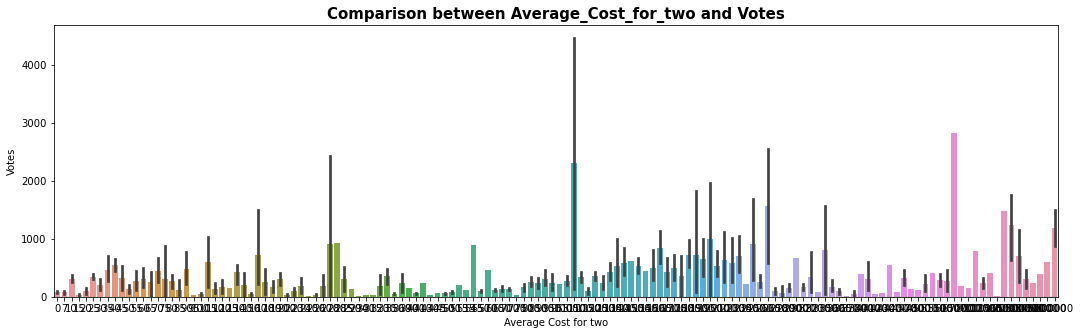

In [48]:
plt.figure(figsize=(18,5))
sns.barplot(x = "Average Cost for two", y = "Votes", data = data)
plt.title('Comparison between Average_Cost_for_two and Votes', fontsize=15, fontweight='bold')
plt.show()

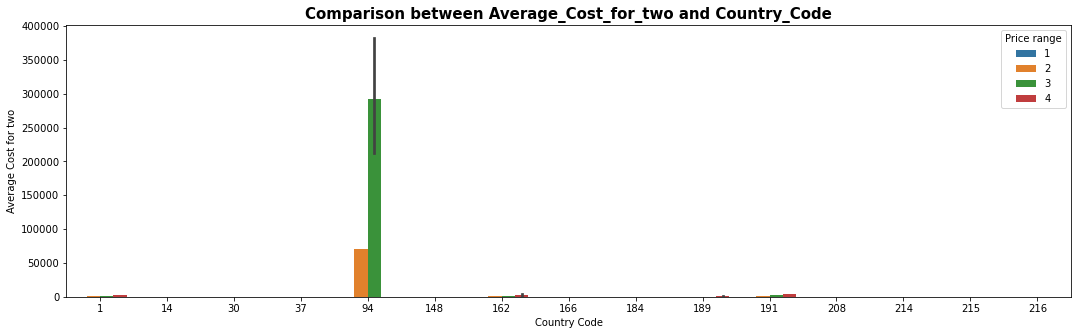

In [49]:
plt.figure(figsize=(18,5))
sns.barplot(y = "Average Cost for two", x= "Country Code", data = data, hue= 'Price range')
plt.title('Comparison between Average_Cost_for_two and Country_Code', fontsize=15, fontweight='bold')
plt.show()

1-No such relation between Average_Cost_for_two and Votes.

2-Maximum Average_Cost_for_two is for Indonesia (Country_Code=94).

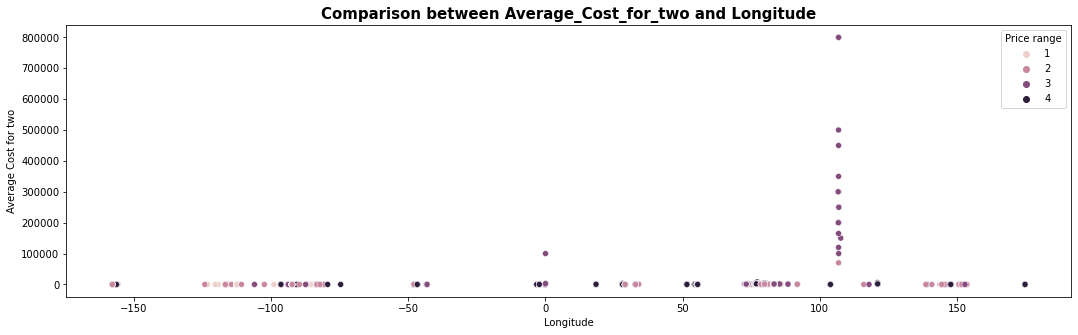

In [50]:
plt.figure(figsize=(18,5))
sns.scatterplot(y = "Average Cost for two", x= "Longitude", data = data, hue= 'Price range')
plt.title('Comparison between Average_Cost_for_two and Longitude', fontsize=15, fontweight='bold')
plt.show()


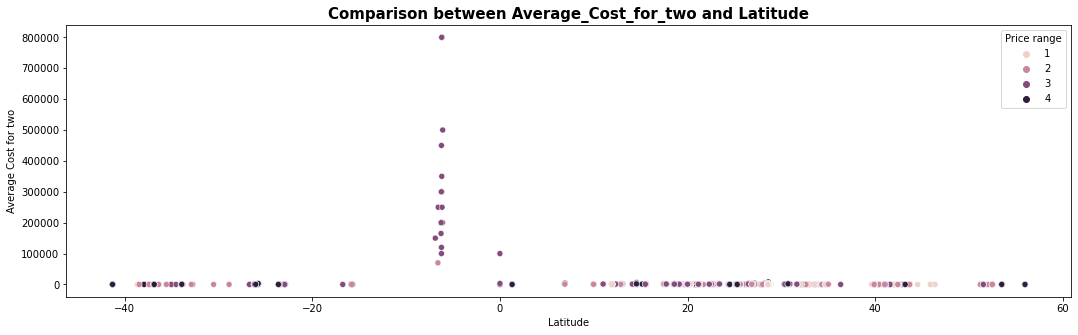

In [51]:
plt.figure(figsize=(18,5))
sns.scatterplot(y = "Average Cost for two", x= "Latitude", data = data, hue= 'Price range')
plt.title('Comparison between Average_Cost_for_two and Latitude', fontsize=15, fontweight='bold')
plt.show()

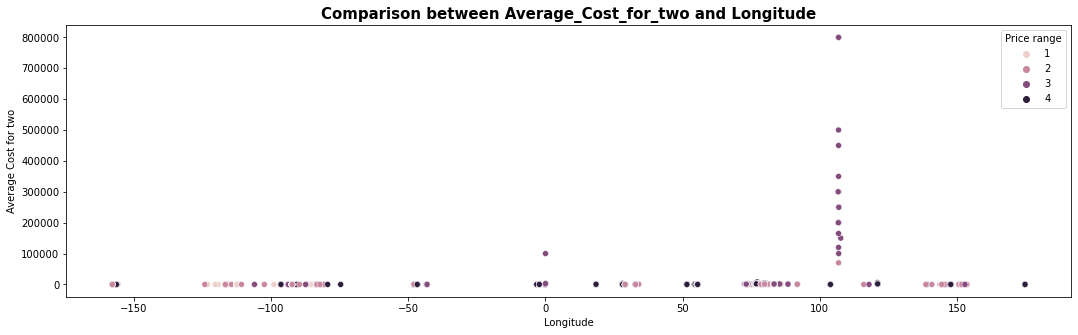

In [52]:
plt.figure(figsize=(18,5))
sns.scatterplot(y = "Average Cost for two", x= "Longitude", data = data, hue= 'Price range')
plt.title('Comparison between Average_Cost_for_two and Longitude', fontsize=15, fontweight='bold')
plt.show()

No such relation is shown from the above plot between Average_Cost_for_two and Latitude, Longitude.

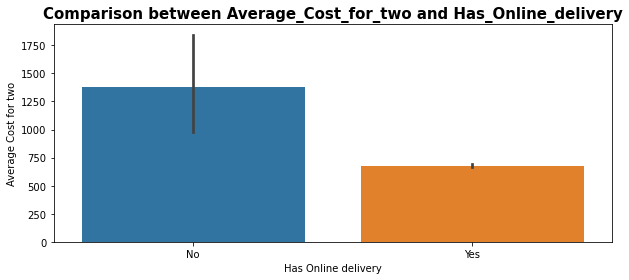

In [53]:
plt.figure(figsize=(10,4))
sns.barplot(y = "Average Cost for two", x= "Has Online delivery", data = data)
plt.title('Comparison between Average_Cost_for_two and Has_Online_delivery', fontsize=15, fontweight='bold')
plt.show()

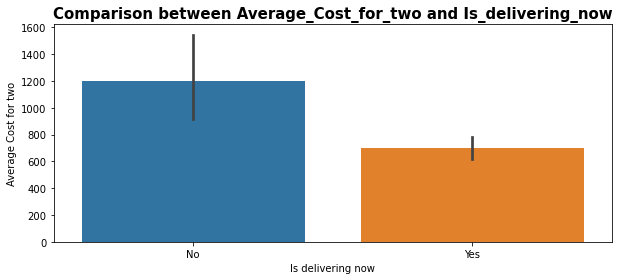

In [54]:
plt.figure(figsize=(10,4))
sns.barplot(y = "Average Cost for two", x= "Is delivering now", data = data)
plt.title('Comparison between Average_Cost_for_two and Is_delivering_now', fontsize=15, fontweight='bold')
plt.show()

Average_Cost_for_two is high for both Is_delivering_now and Has_Online_delivery equal to No.
plt.figure(figsize=(10,4))

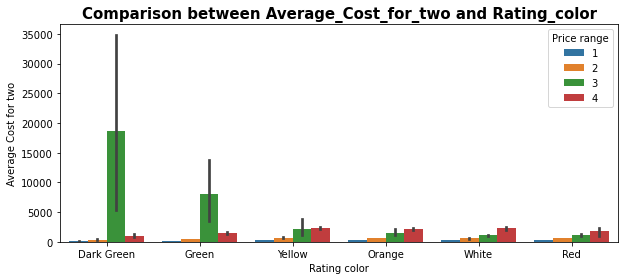

In [55]:
plt.figure(figsize=(10,4))
sns.barplot(y = "Average Cost for two", x= "Rating color", data = data, hue= 'Price range')
plt.title('Comparison between Average_Cost_for_two and Rating_color', fontsize=15, fontweight='bold')
plt.show()

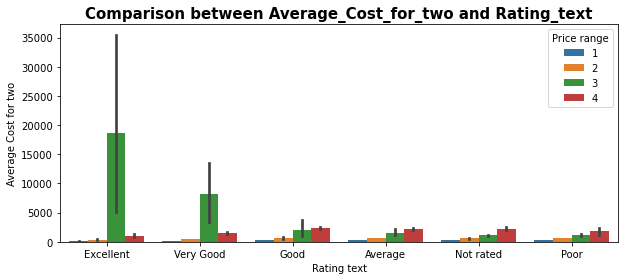

In [56]:
plt.figure(figsize=(10,4))
sns.barplot(y = "Average Cost for two", x= "Rating text", data = data, hue= 'Price range')
plt.title('Comparison between Average_Cost_for_two and Rating_text', fontsize=15, fontweight='bold')
plt.show()

1-Average_Cost_for_two is high for Rating_color equal to Green

2-Average_Cost_for_two is high for Rating_text equal to Excellent.

# Relation with different features and Price_range

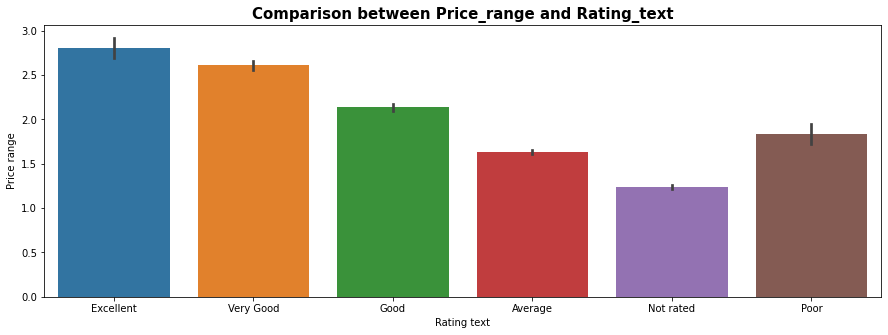

In [57]:
plt.figure(figsize=(15,5))
sns.barplot(y = "Price range", x= "Rating text", data = data)
plt.title('Comparison between Price_range and Rating_text', fontsize=15, fontweight='bold')
plt.show()

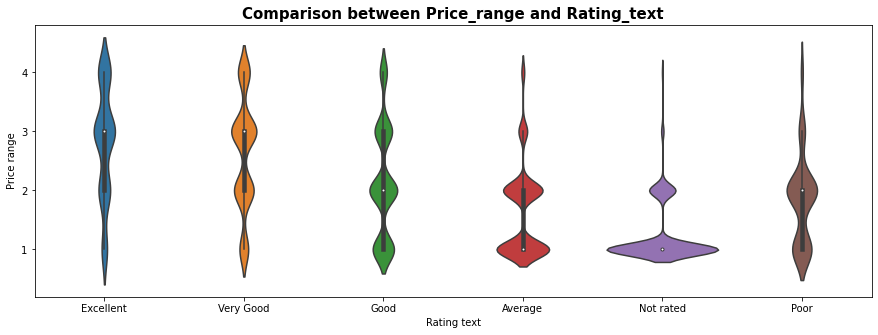

In [58]:
plt.figure(figsize=(15,5))
sns.violinplot(y = "Price range", x= "Rating text", data = data)
plt.title('Comparison between Price_range and Rating_text', fontsize=15, fontweight='bold')
plt.show()

In [59]:
pd.crosstab(data["Price range"],data["Rating text"],margins=True)

Rating text,Average,Excellent,Good,Not rated,Poor,Very Good,All
Price range,,,,,,,
1,1898,32,608,1700,62,144,4444
2,1425,69,794,402,98,325,3113
3,313,126,498,35,20,416,1408
4,101,74,200,11,6,194,586
All,3737,301,2100,2148,186,1079,9551


1-Price_range is high for Excellent Rating_text. It is quite obvious.

2-Total 2148 restaurents are not rated

3-Maximum restaurent are Average.

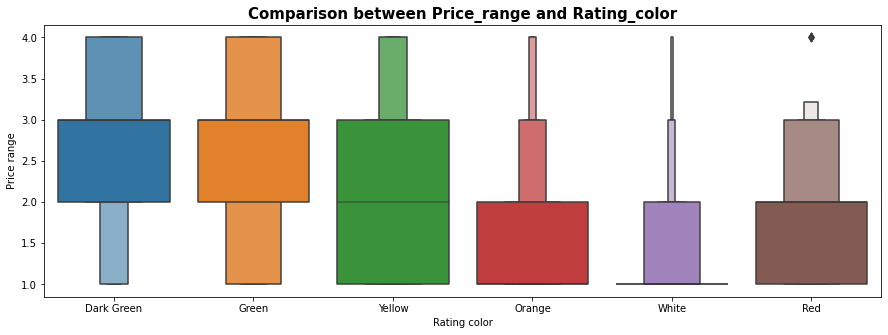

In [60]:
plt.figure(figsize=(15,5))
sns.boxenplot(y = "Price range", x= "Rating color", data = data)
plt.title('Comparison between Price_range and Rating_color', fontsize=15, fontweight='bold')
plt.show()

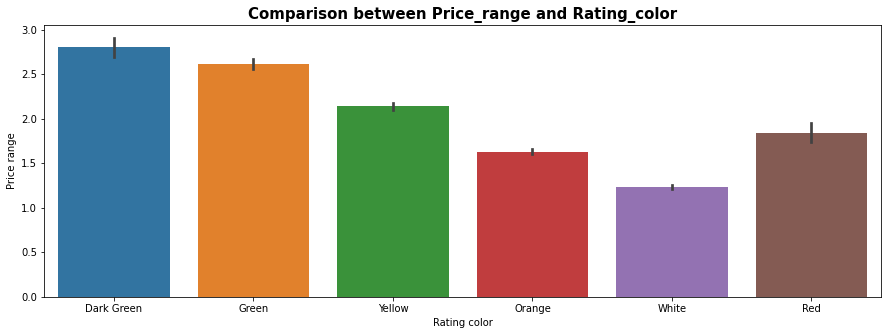

In [61]:
plt.figure(figsize=(15,5))
sns.barplot(y = "Price range", x= "Rating color", data = data)
plt.title('Comparison between Price_range and Rating_color', fontsize=15, fontweight='bold')
plt.show()

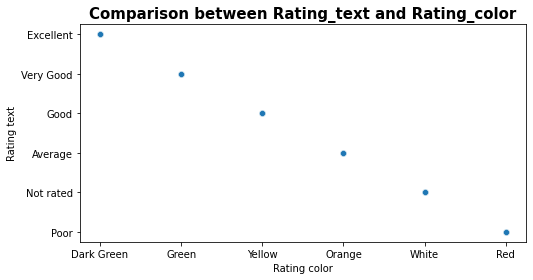

In [62]:
plt.figure(figsize=(8,4))
sns.scatterplot(y = "Rating text", x= "Rating color", data = data)
plt.title('Comparison between Rating_text and Rating_color', fontsize=15, fontweight='bold')
plt.show()

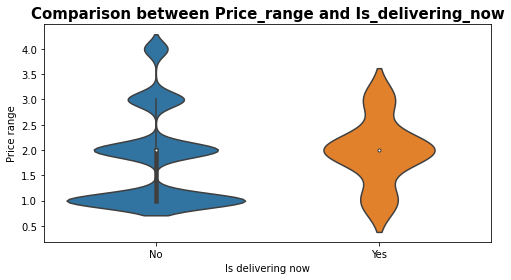

In [63]:
plt.figure(figsize=(8,4))
sns.violinplot(y = "Price range", x= "Is delivering now", data = data)
plt.title('Comparison between Price_range and Is_delivering_now', fontsize=15, fontweight='bold')
plt.show()

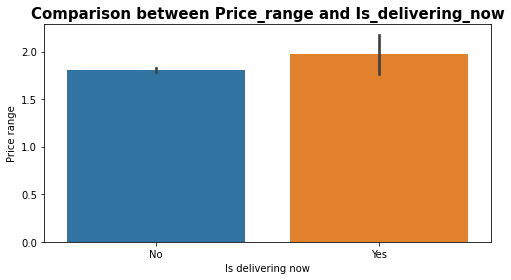

In [64]:
plt.figure(figsize=(8,4))
sns.barplot(y = "Price range", x= "Is delivering now", data = data)
plt.title('Comparison between Price_range and Is_delivering_now', fontsize=15, fontweight='bold')
plt.show()

1-Maximum Price_range is for Darkgreen color.
2-Green stands for Excelent and Red stands for Poor.
3-No specific relation is found between Price_range and Is_delivering_now.

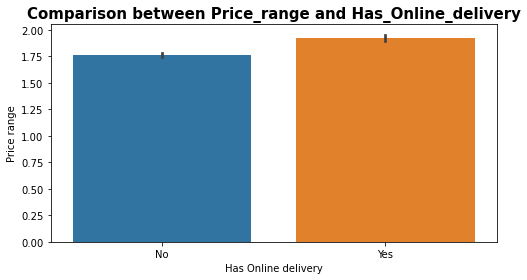

In [65]:
plt.figure(figsize=(8,4))
sns.barplot(y = "Price range", x= "Has Online delivery", data = data)
plt.title('Comparison between Price_range and Has_Online_delivery', fontsize=15, fontweight='bold')
plt.show()

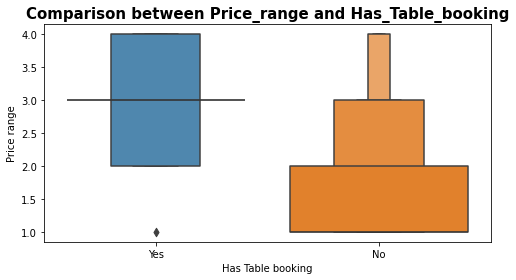

In [66]:
plt.figure(figsize=(8,4))
sns.boxenplot(y = "Price range", x= "Has Table booking", data = data)
plt.title('Comparison between Price_range and Has_Table_booking', fontsize=15, fontweight='bold')
plt.show()

1-Avg price range is high for Has_Table_booking equal to Yes.

2-No specific relation is found between Price_range and Has_Online_delivery.

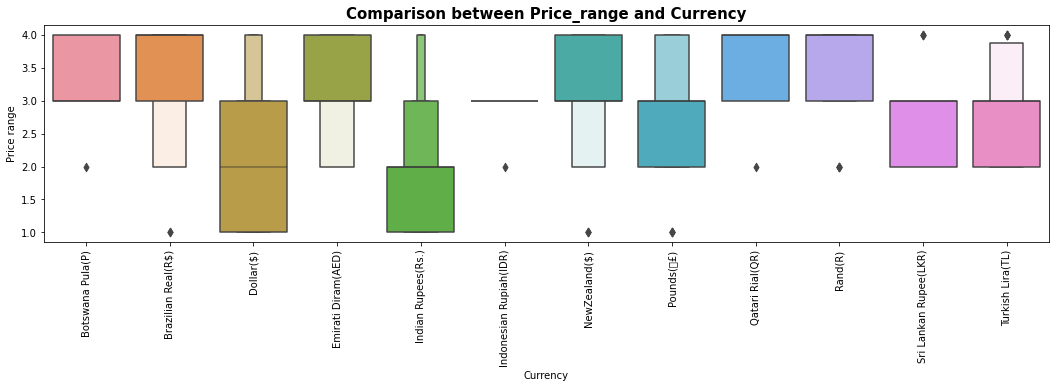

In [67]:
plt.figure(figsize=(18,4))
sns.boxenplot(y = "Price range", x= "Currency", data = data)
plt.title('Comparison between Price_range and Currency', fontsize=15, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

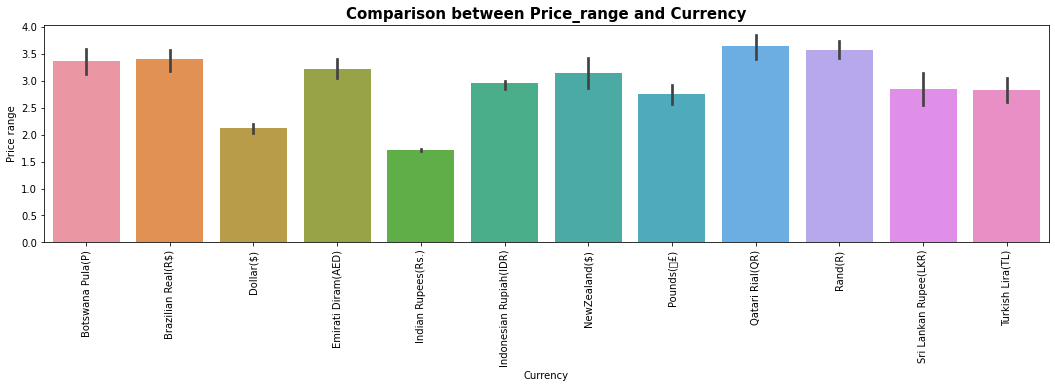

In [68]:
plt.figure(figsize=(18,4))
sns.barplot(y = "Price range", x= "Currency", data = data)
plt.title('Comparison between Price_range and Currency', fontsize=15, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

1-Prics range is low for Indian Rupees(Rs).

2-Prics range is high for Qatari Rial(QR).

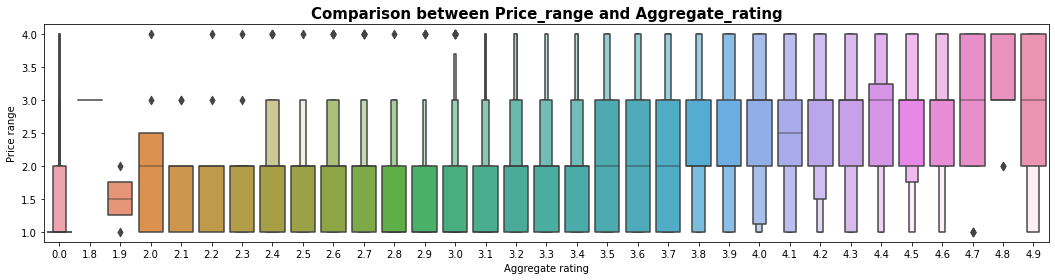

In [69]:
plt.figure(figsize=(18,4))
sns.boxenplot(y = "Price range", x= "Aggregate rating", data = data)
plt.title('Comparison between Price_range and Aggregate_rating', fontsize=15, fontweight='bold')
plt.show()

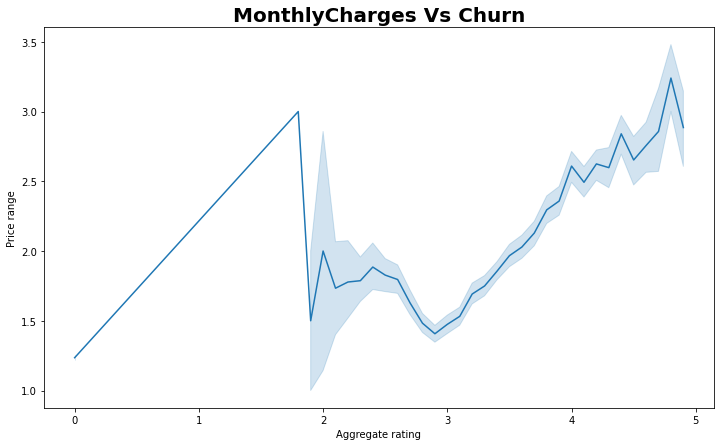

In [70]:
plt.figure(figsize=(12,7))
sns.lineplot(y="Price range", x='Aggregate rating',data=data)
plt.title('MonthlyCharges Vs Churn', fontsize=20, fontweight='bold')
plt.show()

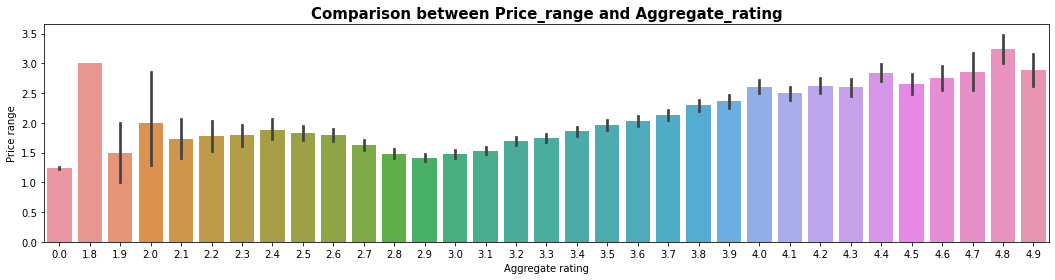

In [71]:
plt.figure(figsize=(18,4))
sns.barplot(y = "Price range", x= "Aggregate rating", data = data)
plt.title('Comparison between Price_range and Aggregate_rating', fontsize=15, fontweight='bold')
plt.show()


1-If Price_range is high, Aggregate_rating is also high.

2-Max price is for 4.8 ratings.

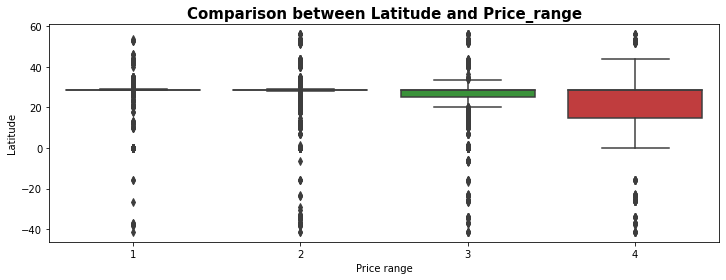

In [72]:
plt.figure(figsize=(12,4))
sns.boxplot(y = "Latitude", x= "Price range", data = data)
plt.title('Comparison between Latitude and Price_range', fontsize=15, fontweight='bold')
plt.show()

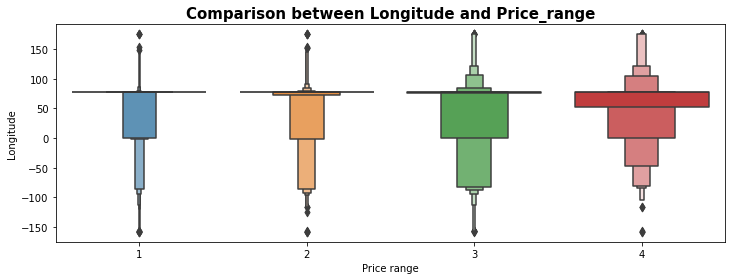

In [73]:
plt.figure(figsize=(12,4))
sns.boxenplot(y = "Longitude", x= "Price range", data = data)
plt.title('Comparison between Longitude and Price_range', fontsize=15, fontweight='bold')
plt.show()

No specific relation is found between Latitude, Longitude and Price_range.

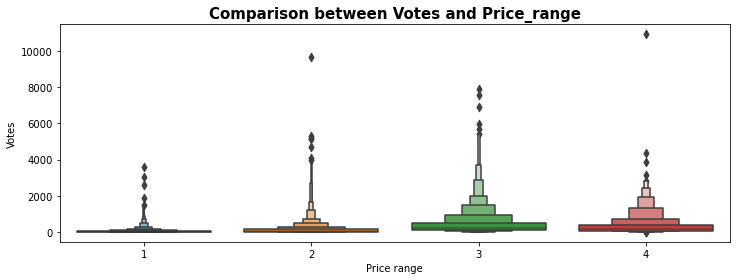

In [74]:
plt.figure(figsize=(12,4))
sns.boxenplot(y = "Votes", x= "Price range", data = data)
plt.title('Comparison between Votes and Price_range', fontsize=15, fontweight='bold')
plt.show()

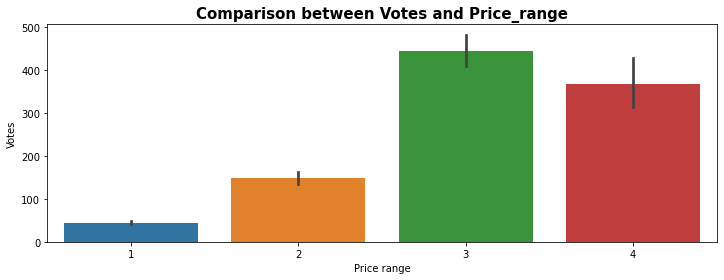

In [75]:
plt.figure(figsize=(12,4))
sns.barplot(y = "Votes", x= "Price range", data = data)
plt.title('Comparison between Votes and Price_range', fontsize=15, fontweight='bold')
plt.show()

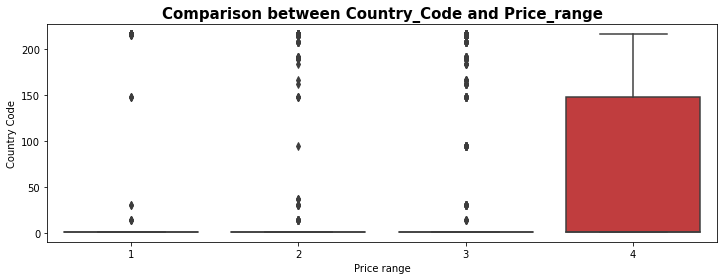

In [76]:
plt.figure(figsize=(12,4))
sns.boxplot(y = "Country Code", x= "Price range", data = data)
plt.title('Comparison between Country_Code and Price_range', fontsize=15, fontweight='bold')
plt.show()

1-Very low votes for Price_range=1

2-Maximum votes for Price_range= 3

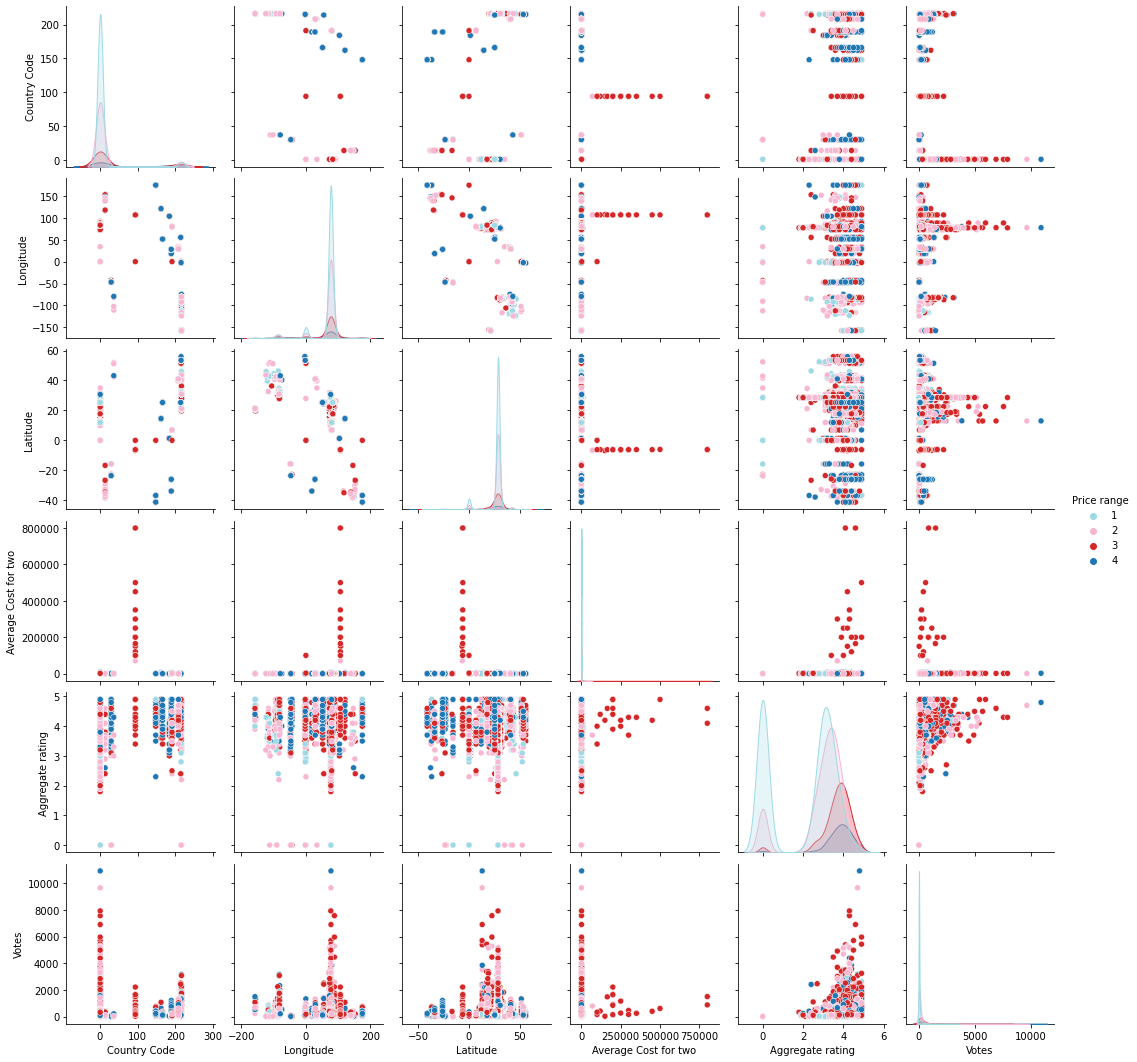

In [77]:
sns.pairplot(data,hue="Price range",palette="tab20_r" )
plt.show()

Nothing special relationship are found from the above pairplot.

# Encoding for categorical features

## Using label encoder

In [78]:
cat_features= ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 
             'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating color', 'Rating text']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_features:
    data[i] = le.fit_transform(data[i])
data.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3749,162,73,8685,171,172,121.027535,14.565443,920,1100,0,1,0,0,3,4.8,0,1,314,Phillipines
1,3173,162,73,6055,593,601,121.014101,14.553708,1111,1200,0,1,0,0,3,4.5,0,1,591,Phillipines
2,2897,162,75,4684,308,314,121.056831,14.581404,1671,4000,0,1,0,0,4,4.4,1,5,270,Phillipines
3,4707,162,75,8690,862,875,121.056475,14.585318,1126,1500,0,0,0,0,4,4.9,0,1,365,Phillipines
4,5523,162,75,8689,862,875,121.057508,14.584450,1122,1500,0,1,0,0,4,4.8,0,1,229,Phillipines


###### All categorical features are encoded

## Correlation

In [79]:
data.corr().T

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
Restaurant Name,1.000000,0.020012,-0.001399,0.000763,0.004322,0.004281,-0.001920,0.009922,0.051679,0.019241,0.009669,0.041173,0.028082,0.011984,0.061275,0.029367,-0.007311,0.012131,0.018512
Country Code,0.020012,1.000000,-0.181728,-0.220342,-0.120075,-0.117543,-0.698299,0.019792,-0.132902,0.043225,-0.033466,-0.061682,-0.154605,-0.018291,0.243327,0.282189,-0.187174,0.222685,0.154530
City,-0.001399,-0.181728,1.000000,-0.019763,0.096444,0.093142,0.117391,-0.004301,0.026614,-0.028838,-0.071996,-0.003762,0.012723,-0.014039,-0.105759,-0.132163,0.110887,-0.098985,-0.078406
Address,0.000763,-0.220342,-0.019763,1.000000,0.159555,0.160495,0.185801,-0.038654,0.023944,0.022749,0.069499,0.006428,0.029874,0.031267,-0.034952,-0.151153,0.071264,-0.008029,-0.101754
Locality,0.004322,-0.120075,0.096444,0.159555,1.000000,0.999465,0.086448,-0.020424,0.006993,-0.012136,0.023723,-0.065594,-0.030993,-0.007299,-0.114459,-0.174336,0.036831,-0.036969,-0.123569
Locality Verbose,0.004281,-0.117543,0.093142,0.160495,0.999465,1.000000,0.084342,-0.020905,0.005960,-0.011852,0.022966,-0.065132,-0.031766,-0.007353,-0.112313,-0.173254,0.037104,-0.035430,-0.122877
Longitude,-0.001920,-0.698299,0.117391,0.185801,0.086448,0.084342,1.000000,0.043207,0.126197,0.045891,0.337334,0.100488,0.178757,0.018787,-0.078939,-0.116818,0.059979,-0.181466,-0.085101
Latitude,0.009922,0.019792,-0.004301,-0.038654,-0.020424,-0.020905,0.043207,1.000000,0.038151,-0.111088,-0.101864,0.054658,0.118722,0.015001,-0.166688,0.000516,0.042590,-0.129447,-0.022962
Cuisines,0.051679,-0.132902,0.026614,0.023944,0.006993,0.005960,0.126197,0.038151,1.000000,0.005831,0.068912,0.050639,-0.016639,0.007773,-0.005350,-0.080331,-0.016228,-0.079979,-0.032719
Average Cost for two,0.019241,0.043225,-0.028838,0.022749,-0.012136,-0.011852,0.045891,-0.111088,0.005831,1.000000,0.045615,0.007758,-0.018974,-0.001862,0.075083,0.051792,-0.049970,0.031439,0.067783


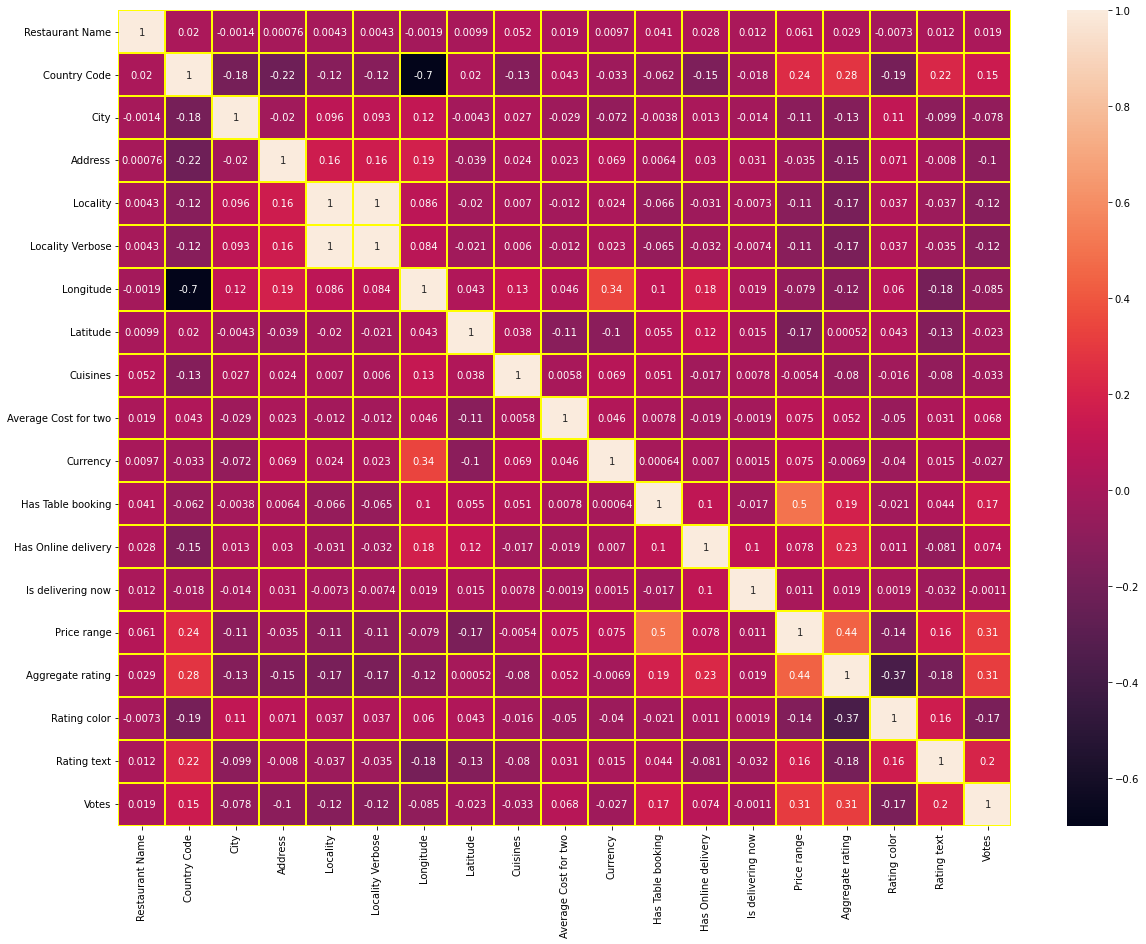

In [80]:
plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(), annot= True, linecolor= "yellow",  linewidths= 2)
plt.show()

In [81]:
data.drop(['Locality Verbose'], axis=1, inplace =True)
data.shape

(9551, 19)

# Correlation of Other features with Average_Cost_for_two (target 1)

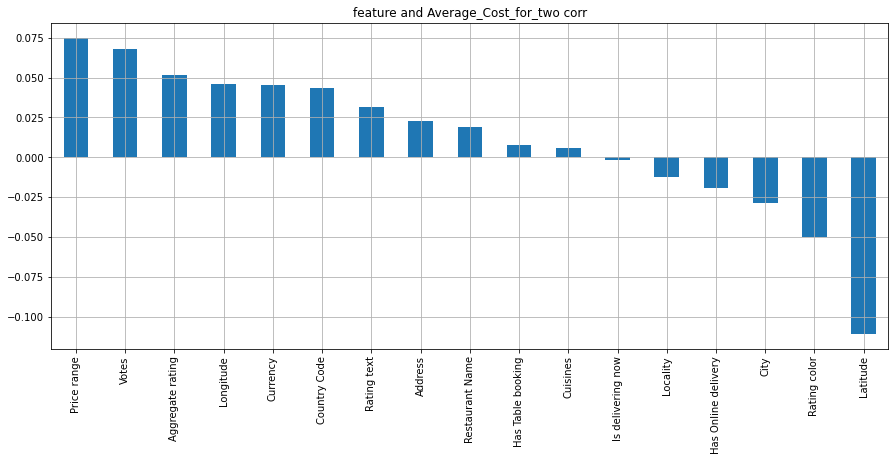

In [82]:
data.drop("Average Cost for two", axis=1).corrwith(data["Average Cost for two"]).sort_values(ascending=False).plot(kind='bar',
        figsize=(15,6),grid='True',title='feature and Average_Cost_for_two corr')
plt.show()

# Correlation of Other features with Price_range (target 2)

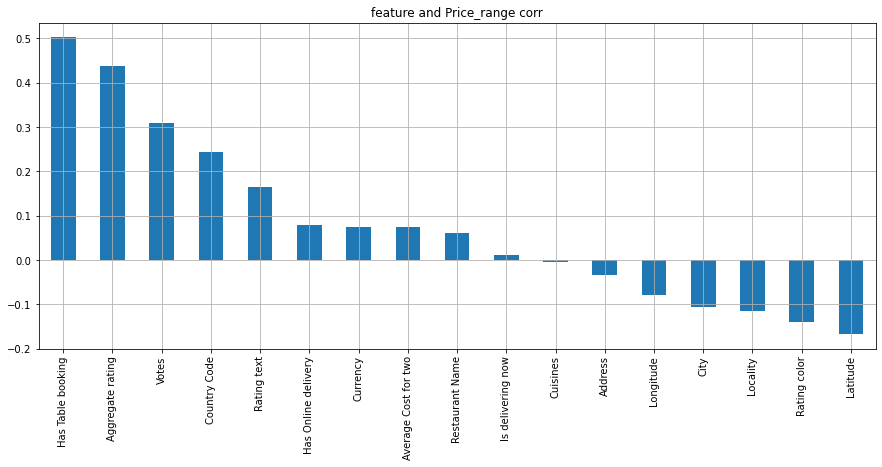

In [83]:
data.drop("Price range", axis=1).corrwith(data["Price range"]).sort_values(ascending=False).plot(kind='bar',
        figsize=(15,6),grid='True',title='feature and Price_range corr')
plt.show()

1-Average_Cost_for_two is highly correlated with Latitude but the relation is negetive.

2-Price_range is highly correlated with Has_Table_booking and the relation is positive.

## Skewness

In [84]:
data.skew().sort_values()

Latitude                -3.081635
Longitude               -2.807328
City                    -1.193777
Aggregate rating        -0.954130
Cuisines                -0.307425
Locality                -0.253554
Address                 -0.040407
Restaurant Name          0.044637
Rating color             0.046009
Rating text              0.431408
Price range              0.889618
Has Online delivery      1.114620
Has Table booking        2.321100
Currency                 2.858093
Country Code             3.043965
Votes                    8.807637
Is delivering now       16.673412
Average Cost for two    35.477915
dtype: float64

1-skewness is present in some columns

2-Latitude, Longitude, Aggregate_rating has Skewness in continuous numarical variables. Let's remove the skewness.

In [85]:
skew_data =['Latitude', 'Longitude', 'Aggregate rating']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

data[skew_data] = scaler.fit_transform(data[skew_data].values)
data[skew_data].skew()

Latitude           -0.293200
Longitude          -0.803832
Aggregate rating   -0.610806
dtype: float64

###### Overall skewness is removed

## For label 1 (Average_Cost_for_two)

## Checking Multicollinearity

In [86]:
data1=data.copy()

In [87]:
x = data.drop(['Average Cost for two'], axis =1)
y = data['Average Cost for two']

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


x = x.dropna()
x = x.replace([np.inf, -np.inf], np.nan).dropna()

# Calculate VIF for numeric columns only
numeric_columns = x.select_dtypes(include=[np.number])
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(numeric_columns.values, i) for i in range(numeric_columns.shape[1])]
vif["Features"] = numeric_columns.columns
print(vif)


          VIF             Features
0    3.800147      Restaurant Name
1    2.331744         Country Code
2    9.878106                 City
3    4.345634              Address
4    5.393469             Locality
5    1.485708            Longitude
6    1.222624             Latitude
7    4.633416             Cuisines
8   14.029155             Currency
9    1.640551    Has Table booking
10   1.539163  Has Online delivery
11   1.017530    Is delivering now
12   9.091214          Price range
13   1.850306     Aggregate rating
14   5.598690         Rating color
15   2.680332          Rating text
16   1.431819                Votes


A little bit of Multicollinearity is present in Currency features. But, it is Ok. Let's keep it.

## Standard Scaling

In [89]:
from sklearn.preprocessing import StandardScaler
x = x.drop("Country", axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaled data
x_scale = scaler.fit_transform(x)


## Principal Component Analysis (PCA)

In [90]:
from sklearn.decomposition import PCA
pca = PCA()

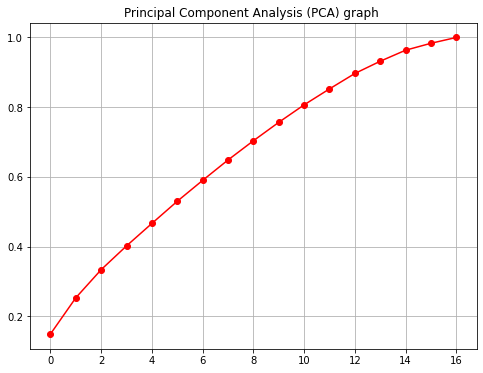

In [91]:
x_pca = pca.fit_transform(x_scale)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.title('Principal Component Analysis (PCA) graph ')
plt.grid()

Let's keep all of the components.

## Final predictions using different Regression ML Models for Average_Cost_for_two (target 1) 

### Find best Random state

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r2_max=0
random_max=0
for i in range(500,2000):
    x_train,x_test,y_train,y_test = train_test_split (x_scale,y,test_size = 0.25, random_state=i)
    lin_reg= LinearRegression()
    
    lin_reg.fit(x_train,y_train)
    y_pred=lin_reg.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    
    if r2>r2_max:
        r2_max=r2
        random_max=i
print('Best accuracy is', r2_max ,'on Random_state', random_max)

Best accuracy is 0.09760311636548402 on Random_state 1500


In [96]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (7163, 17)
Training target shape: (7163,)
Test feature shape: (2388, 17)
Test target shape: (2388,)


## Observations

### For random state=1500, the accuracy score is best. Lets take this random state for further steps.

### Using LinearRegression()

In [97]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=1500 )

lin_reg= LinearRegression()

lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.09760311636548402
Mean absolute error: 1902.5622495968196
Mean square error: 143120215.43388733
Root mean square error: 11963.28614695341


## Using GridSearchCV

In [98]:
from sklearn.model_selection import GridSearchCV

grid = dict(fit_intercept=['True', 'False'], n_jobs=[1,-1])

grid_lin = GridSearchCV(estimator=lin_reg, param_grid= grid, cv=9)

grid_lin.fit(x_train, y_train)
grid_lin.best_params_

{'fit_intercept': 'True', 'n_jobs': 1}

In [99]:
grid_lin_best = LinearRegression(fit_intercept= 'True', n_jobs= 1)

grid_lin_best.fit(x_train, y_train)
y_pred = grid_lin_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.09760311636548402
Mean absolute error: 1902.5622495968196
Mean square error: 143120215.43388733
Root mean square error: 11963.28614695341


No such improvement seen after GridSearchCV.

## Using DecisionTreeRegressor()

In [100]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: -2.5968226104657073
Mean absolute error: 1392.0833333333333
Mean square error: 570456343.7918761
Root mean square error: 23884.2279295747


### Using GridSearchCV

In [101]:
param = {'criterion' : ["squared_error", "friedman_mse", "absolute_error"],
    'min_samples_split' : range(1,4),
    'splitter' : ["best", "random"],
    'min_samples_leaf' : range(1,3)}

grid_search = GridSearchCV(estimator = dt,cv=5,param_grid = param)
grid_search.fit(x_train, y_train)

print("Best Parameters:" , grid_search.best_params_)

Best Parameters: {'criterion': 'friedman_mse', 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}


In [102]:
grid_dt_best = grid_search.best_estimator_
grid_dt_best.fit(x_train, y_train)

y_pred = grid_dt_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: -2.5906684088471867
Mean absolute error: 1342.3785594639867
Mean square error: 569480286.9399079
Root mean square error: 23863.786098184584


After using Gridsearch CV, R2 is not improved. This is the wrost fitting model for this dataset because the r2 score is negetive

## Using KNeighborsRegressor()

In [103]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
rmse_val = []
for i in range(0,20):
    i = i+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = i)

    knn.fit(x_train,y_train) 
    y_pred=knn.predict(x_test) 
    error =np. sqrt(mean_squared_error(y_test,y_pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , i , 'is:', error)

RMSE value for k=  1 is: 23043.555996385254
RMSE value for k=  2 is: 16039.541512392549
RMSE value for k=  3 is: 14086.864955988143
RMSE value for k=  4 is: 11879.89442518641
RMSE value for k=  5 is: 11350.248702278195
RMSE value for k=  6 is: 9087.15812670214
RMSE value for k=  7 is: 7840.95353180134
RMSE value for k=  8 is: 6728.896485760335
RMSE value for k=  9 is: 5734.010797914359
RMSE value for k=  10 is: 5083.298320002299
RMSE value for k=  11 is: 4824.072763612863
RMSE value for k=  12 is: 4798.367800593387
RMSE value for k=  13 is: 4715.798060843587
RMSE value for k=  14 is: 4799.528254586479
RMSE value for k=  15 is: 5010.582634142432
RMSE value for k=  16 is: 5438.937787324728
RMSE value for k=  17 is: 5527.9549379523505
RMSE value for k=  18 is: 6102.622811143347
RMSE value for k=  19 is: 6375.899132829509
RMSE value for k=  20 is: 6675.629440641099


In [104]:
min(rmse_val)

4715.798060843587

#### For k=13 we get the best RMSE value for KNeighborsRegressor()

In [105]:
knn =KNeighborsRegressor(n_neighbors= 13)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.859780955094878
Mean absolute error: 388.08088519520675
Mean square error: 22238751.35065614
Root mean square error: 4715.798060843587


## Using GridSearchCV

In [106]:
param = {'algorithm' : ['auto', 'ball_tree', 'kd_tree'],
             'leaf_size' : [30,40,25],
             'n_neighbors' : [13],'weights': ['uniform', 'distance']}
    

gridsearchknn = GridSearchCV(estimator = knn, param_grid=param, cv=5)

gridsearchknn.fit(x_train, y_train) 

print("Best Parameters:" , gridsearchknn.best_params_)

Best Parameters: {'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 13, 'weights': 'distance'}


In [107]:
grid_knn_best = gridsearchknn.best_estimator_

grid_knn_best.fit(x_train, y_train)

y_pred = grid_knn_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.7974428426183573
Mean absolute error: 466.6470764334217
Mean square error: 32125580.80362111
Root mean square error: 5667.943260444754


#### R2 Score and RMSE are not improved after GridSearchCV.

## Using RandomForestRegressor()

In [108]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: -0.6971476070482616
Mean absolute error: 982.2993886097154
Mean square error: 269167741.5435646
Root mean square error: 16406.332361120953


### As r2 score after using Random forest is negetive, it is the wrost model for our dataset.

## Using Support Vector Regression()

In [109]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(x_train, y_train)

y_pred = svr_rbf.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: -0.0036621967717329618
Mean absolute error: 1035.5730930908394
Mean square error: 159180901.91787177


In [110]:
from sklearn.svm import SVR
svr_poly = SVR(kernel='poly')
svr_poly.fit(x_train, y_train)

y_pred = svr_poly.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: -0.004038040095459605
Mean absolute error: 1044.920981854738
Mean square error: 159240510.6980401


In [111]:
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear', )
svr_lin.fit(x_train, y_train)

y_pred = svr_lin.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: -0.0031762486028765746
Mean absolute error: 941.9807731660669
Mean square error: 159103830.50076282


### Using GridSearchCV

In [112]:
params = {'gamma':['scale', 'auto'],'C':[1.0,0.1], 'kernel':['poly']}

svr_grd = GridSearchCV(svr_lin, param_grid = params, cv=5)
svr_grd.fit(x_train, y_train)
print('best params : ', svr_grd.best_params_)

best params :  {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}


In [113]:
grid_svr_best = svr_grd.best_estimator_
grid_svr_best.fit(x_train, y_train)

y_pred = grid_svr_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: -0.004038040095459605
Mean absolute error: 1044.920981854738
Mean square error: 159240510.6980401
Root mean square error: 12619.053478690075


#### r2 score, RMSE are not improved after using hyperparameter..

## Using GradientBoostingRegressor()

In [114]:
from sklearn.ensemble import  GradientBoostingRegressor

gbdt= GradientBoostingRegressor()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: -0.9997066783287598
Mean absolute error: 1097.7864884249939
Mean square error: 317153633.61439747
Root mean square error: 17808.80775387273


#### Using GridSearchCV

In [115]:
params = {'loss': ['squared_error', 'absolute_error'], 'n_estimators':[100,130]}

gbdt_grd = GridSearchCV(gbdt, param_grid = params, cv=5)
gbdt_grd.fit(x_train, y_train)
print('best params : ', gbdt_grd.best_params_)

best params :  {'loss': 'squared_error', 'n_estimators': 100}


In [116]:
grid_gbdt_best = gbdt_grd.best_estimator_

grid_gbdt_best.fit(x_train, y_train)

y_pred = grid_gbdt_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: -1.0174561968113083
Mean absolute error: 1104.8871414777877
Mean square error: 319968708.61647266
Root mean square error: 17887.669177857486


#### r2 score, RMSE are slightly improved after GridSearchCV. this is also wrost fitted model.

## Using AdaBoostRegressor()

In [117]:
from sklearn.ensemble import AdaBoostRegressor

ada= AdaBoostRegressor()
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: -0.6899450542628303
Mean absolute error: 1057.0056727320637
Mean square error: 268025416.11556327
Root mean square error: 16371.481793520197


### Using GridSearchCV

In [118]:
params = { 'loss' : ['linear', 'square'], 'learning_rate': [0.1,0.01] ,
        'n_estimators':[50,60] }

ada_grd = GridSearchCV(ada, param_grid = params, cv=5)
ada_grd.fit(x_train, y_train)
print('best params : ', ada_grd.best_params_)

best params :  {'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 50}


In [119]:
grid_ada_best = ada_grd.best_estimator_

grid_ada_best.fit(x_train, y_train)

y_pred = grid_ada_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))


#### r2 score, RMSE are improved after GridSearchCV. This is also wrost model.

### As per 7 different regression model we can see that the model with maximum R2 score and minimum RMSE value is KNN Regression() and GradientBoostingRegressor().

## Cross Validation

In [120]:
from sklearn.model_selection import cross_val_score

all_models = [grid_lin_best , grid_dt_best , knn , rf , grid_svr_best , grid_gbdt_best, grid_ada_best]

for i in all_models:
    cvscore = cross_val_score(i, x_scale,y, cv = 5)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LinearRegression(fit_intercept='True', n_jobs=1)

 Cross Validation Score :  [-6.23003138e+03 -1.79018986e+01 -2.44810053e+00 -1.04859961e+00
 -5.28649942e-03]

Mean CV Score : -1250.2870539185951

Std deviation : 2489.8807214359676

-----------
-----------
Cross Validation Score of : DecisionTreeRegressor(criterion='friedman_mse', min_samples_split=3)

 Cross Validation Score :  [-4.45901621e+03  6.54678507e-01  7.45268622e-01  7.50361809e-01
 -9.57519526e-03]

Mean CV Score : -891.3750960638724

Std deviation : 1783.8205815056713

-----------
-----------
Cross Validation Score of : KNeighborsRegressor(n_neighbors=13)

 Cross Validation Score :  [-1.52087308e+02 -3.95115501e+00  7.01529791e-01  6.75954706e-01
 -4.94991895e-03]

Mean CV Score : -30.933185685001682

Std deviation : 60.60165027207564

-----------
-----------
Cross Validation Score of : RandomForestRegressor()

 Cross Validation Score :  [-6.72861363e+03  8.40370857e-01  8.14492936e-01  8.42448

#### here also KNNRegressor is the best model with max cv score and min std.

In [124]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
#LASSO Regression

lassocv= LassoCV()
lassocv.fit(x_train, y_train)
alpha= lassocv.alpha_   #best learning rate for LASSO
alpha  

44.35123206116785

In [125]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
print ("Score after applying LASSO regression on the model is :", lasso_reg.score(x_test, y_test))

Score after applying LASSO regression on the model is : 0.09487282623492554


## Our final model is KNN Regressor() for this particular dataset for calculating Average_Cost_for_two_Regression.

# Final Model

In [126]:
y_pred = knn.predict(x_test)
y_pred

array([ 261.53846154,  269.23076923,  373.07692308, ...,  342.30769231,
        592.30769231, 1573.07692308])

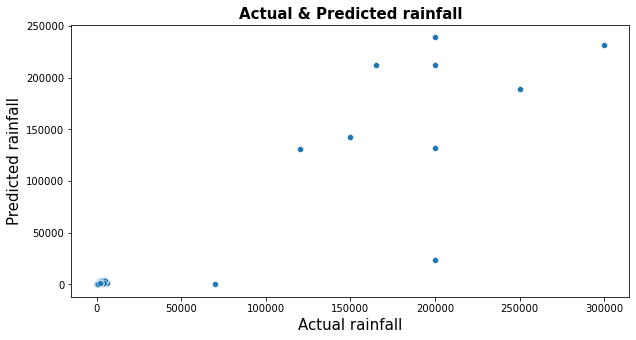

In [127]:
# Let's visualize the variation of actual test data and predicted data
plt.figure(figsize=(10,5))
sns.scatterplot(y_test.round(2), y_pred)
plt.xlabel("Actual rainfall", fontsize= 15)
plt.ylabel("Predicted rainfall",fontsize= 15)
plt.title("Actual & Predicted rainfall" , fontsize= 15, fontweight= 'bold')
plt.show()

In [128]:
print('Final R2 Score:', r2_score(y_test, y_pred))
print('\nFinal Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('\nFinal Mean square error:', mean_squared_error(y_test, y_pred))
print('\nFinal Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

Final R2 Score: 0.859780955094878

Final Mean absolute error: 388.08088519520675

Final Mean square error: 22238751.35065614

Final Root mean square error: 4715.798060843587


## Load and save the model

### Now , let's save the model for future use.

In [129]:
import pickle
pickle.dump(knn, open("Average_Cost_for_two_Regression_model", "wb"))

load_Average_Cost_for_two_Regression_model= pickle.load(open("Average_Cost_for_two_Regression_model", "rb"))

In [131]:
y_pred = load_Average_Cost_for_two_Regression_model.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n=10)

,Predicted Values,Actual Values
2302,380.769231,150
2036,646.153846,650
581,526.923077,600
1641,269.230769,100
1528,1261.538462,1000
142,323.076923,400
934,242.307692,350
2164,41.923077,30
1388,246.153846,400
1789,676.923077,700


# For label 2 (Price_range)

## Checking Multicollinearity

In [133]:
x = data.drop(['Price range'], axis =1)
y = data['Price range']

#### A little bit of Multicollinearity is present in Currency features. But, it is Ok. Let's keep it.

In [136]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


x = x.dropna()
x = x.replace([np.inf, -np.inf], np.nan).dropna()

numeric_columns = x.select_dtypes(include=[np.number])
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(numeric_columns.values, i) for i in range(numeric_columns.shape[1])]
vif["Features"] = numeric_columns.columns
print(vif)


          VIF              Features
0    3.776736       Restaurant Name
1    2.233849          Country Code
2    9.759963                  City
3    4.305798               Address
4    5.383288              Locality
5    1.507421             Longitude
6    1.193568              Latitude
7    4.589888              Cuisines
8    1.046601  Average Cost for two
9   13.001152              Currency
10   1.247037     Has Table booking
11   1.539003   Has Online delivery
12   1.016817     Is delivering now
13   1.625457      Aggregate rating
14   5.555160          Rating color
15   2.624937           Rating text
16   1.418477                 Votes


##### A little bit of Multicollinearity is present in Currency features. But, it is Ok. Let's keep it.

## Standard Scaling

In [138]:
from sklearn.preprocessing import StandardScaler
x = x.drop("Country", axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaled data
x_scale = scaler.fit_transform(x)

In [139]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

from sklearn.linear_model import LogisticRegression

acc_max=0
random_max=0
for i in range(0, 500):
    x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=i)
    log= LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc= accuracy_score(y_test,y_pred)
    if acc>acc_max:
        acc_max=acc
        random_max=i
        
print('Best accuracy is', acc_max ,'on Random_state', random_max)

Best accuracy is 0.6687604690117253 on Random_state 139


In [140]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (7163, 17)
Training target shape: (7163,)
Test feature shape: (2388, 17)
Test target shape: (2388,)


## Using LogisticRegression()

In [141]:
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=369)

log = LogisticRegression()

log.fit(x_train, y_train)

y_pred = log.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', log.score(x_train, y_train))
print('testing score : ', log.score(x_test, y_test))

accu score :  0.6687604690117253
cof_mat:
  [[1004  119   12    1]
 [ 320  364   62    7]
 [  22  126  191   18]
 [   7   32   65   38]]
classification report:
                precision    recall  f1-score   support

           1       0.74      0.88      0.81      1136
           2       0.57      0.48      0.52       753
           3       0.58      0.54      0.56       357
           4       0.59      0.27      0.37       142

    accuracy                           0.67      2388
   macro avg       0.62      0.54      0.56      2388
weighted avg       0.65      0.67      0.65      2388

-----------
-----------
training score :  0.6467960351807902
testing score :  0.6687604690117253


## Use GridSearchCV for hyperparameter tuning

In [142]:
from sklearn.model_selection import GridSearchCV
grid = dict(solver=['newton-cg', 'lbfgs', 'liblinear', 'sag'],penalty=['l2','l1','elasticnet', 'none'], C=[1.0, 0.1,0.01, 0.001]
           , max_iter=[100, 140, 80])

grid_log = GridSearchCV(estimator=log, param_grid= grid, cv=5 )

grid_log.fit(x_train, y_train)
print('best params : ', grid_log.best_params_)

best params :  {'C': 1.0, 'max_iter': 140, 'penalty': 'none', 'solver': 'lbfgs'}


In [144]:
grid_log_best = grid_log.best_estimator_
grid_log_best.fit(x_train, y_train)

y_pred = grid_log_best.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', grid_log_best.score(x_train, y_train))
print('testing score : ', grid_log_best.score(x_test, y_test))

accu score :  0.8563651591289783
cof_mat:

  [[1087   41    7    1]
 [  35  685   26    7]
 [  13   90  235   19]
 [   9    6   89   38]]
classification report:
                precision    recall  f1-score   support

           1       0.95      0.96      0.95      1136
           2       0.83      0.91      0.87       753
           3       0.66      0.66      0.66       357
           4       0.58      0.27      0.37       142

    accuracy                           0.86      2388
   macro avg       0.76      0.70      0.71      2388
weighted avg       0.85      0.86      0.85      2388

-----------
-----------
training score :  0.8564847131090325
testing score :  0.8563651591289783


Accuracy score is improved after using gridsearchCV 

## Using DecisionTreeClassifier()

In [145]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', clf.score(x_train, y_train))
print('testing score : ', clf.score(x_test, y_test))

accu score :  0.9752931323283082


cof_mat:  [[1128    8    0    0]
 [   4  742    7    0]
 [   0   14  336    7]
 [   0    0   19  123]]


classification report: 

               precision    recall  f1-score   support

           1       1.00      0.99      0.99      1136
           2       0.97      0.99      0.98       753
           3       0.93      0.94      0.93       357
           4       0.95      0.87      0.90       142

    accuracy                           0.98      2388
   macro avg       0.96      0.95      0.95      2388
weighted avg       0.98      0.98      0.98      2388

-----------
-----------
training score :  1.0
testing score :  0.9752931323283082


### Use GridSearchCV for hyperparameter tuning

In [146]:
param = {'criterion' : ['gini', 'entropy'], 'splitter': ["best", "random"], 'ccp_alpha': [0.1, .01, 0.001],
        'max_features': ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(estimator = clf, cv=5, param_grid = param)

grid_search.fit(x_train, y_train)
print('best params : ', grid_search.best_params_)

best params :  {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}


In [147]:
grid_clf_best = grid_search.best_estimator_
grid_clf_best.fit(x_train, y_train)

y_pred = grid_clf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_clf_best.score(x_train, y_train))
print('testing score : ', grid_clf_best.score(x_test, y_test))

accu score :  0.9484924623115578


cof_mat:  [[1112   16    6    2]
 [  14  714   23    2]
 [   0   18  330    9]
 [   0    2   31  109]]


classification report: 

               precision    recall  f1-score   support

           1       0.99      0.98      0.98      1136
           2       0.95      0.95      0.95       753
           3       0.85      0.92      0.88       357
           4       0.89      0.77      0.83       142

    accuracy                           0.95      2388
   macro avg       0.92      0.90      0.91      2388
weighted avg       0.95      0.95      0.95      2388

-----------
-----------
training score :  0.9666340918609521
testing score :  0.9484924623115578


Accuracy score is not improved after using GridSearchCV with DecisionTreeClassifier().

But the difference between training score, testing score is decreased.

## Using GradientBoostingClassifier()

In [148]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt= GradientBoostingClassifier()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', gbdt.score(x_train, y_train))
print('testing score : ', gbdt.score(x_test, y_test))

accu score :  0.9752931323283082


cof_mat:  [[1133    3    0    0]
 [   6  735   12    0]
 [   0   15  338    4]
 [   0    0   19  123]]


classification report: 

               precision    recall  f1-score   support

           1       0.99      1.00      1.00      1136
           2       0.98      0.98      0.98       753
           3       0.92      0.95      0.93       357
           4       0.97      0.87      0.91       142

    accuracy                           0.98      2388
   macro avg       0.96      0.95      0.95      2388
weighted avg       0.98      0.98      0.98      2388

-----------
-----------
training score :  0.9923216529387129
testing score :  0.9752931323283082


### Using Gridsearch CV:

In [149]:
param= {"min_samples_split" : [2,3],"learning_rate": [0.1,0.01], 
        "criterion":['friedman_mse', 'squared_error'] }

grid_gbdt= GridSearchCV (gbdt, param_grid= param,cv=5)

grid_gbdt.fit(x_train, y_train)
print('best params : ', grid_gbdt.best_params_)

best params :  {'criterion': 'squared_error', 'learning_rate': 0.1, 'min_samples_split': 2}


In [151]:
grid_gbdt_best = grid_gbdt.best_estimator_
grid_gbdt_best.fit(x_train, y_train)

y_pred = grid_gbdt_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report:\n\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_gbdt_best.score(x_train, y_train))
print('testing score : ', grid_gbdt_best.score(x_test, y_test))

accu score :  0.97571189279732


cof_mat:  [[1133    3    0    0]
 [   6  735   12    0]
 [   0   14  339    4]
 [   0    0   19  123]]


classification report:

                precision    recall  f1-score   support

           1       0.99      1.00      1.00      1136
           2       0.98      0.98      0.98       753
           3       0.92      0.95      0.93       357
           4       0.97      0.87      0.91       142

    accuracy                           0.98      2388
   macro avg       0.96      0.95      0.95      2388
weighted avg       0.98      0.98      0.98      2388

-----------
-----------
training score :  0.9923216529387129
testing score :  0.97571189279732


#### Accuracy score, training score, testing score are not improved after using GridSearchCV with GradientBoostingClassifier()

## Using RandomForestClassifier()

In [152]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', rf.score(x_train, y_train))
print('testing score : ', rf.score(x_test, y_test))

accu score :  0.974036850921273


cof_mat:  [[1133    3    0    0]
 [   6  737   10    0]
 [   0   15  340    2]
 [   0    0   26  116]]


classification report:                precision    recall  f1-score   support

           1       0.99      1.00      1.00      1136
           2       0.98      0.98      0.98       753
           3       0.90      0.95      0.93       357
           4       0.98      0.82      0.89       142

    accuracy                           0.97      2388
   macro avg       0.96      0.94      0.95      2388
weighted avg       0.97      0.97      0.97      2388

-----------
-----------
training score :  1.0
testing score :  0.974036850921273


## Use GridSearchCV for hyperparameter tuning

In [153]:
params = {'n_estimators' : [100,80, 150], 'min_samples_leaf': [1,2,3],
          'criterion' : ["gini", "entropy"]}

rf_grd = GridSearchCV(rf, param_grid = params, cv=5)

rf_grd.fit(x_train, y_train)
print('best params : ', rf_grd.best_params_)

best params :  {'criterion': 'gini', 'min_samples_leaf': 1, 'n_estimators': 150}


In [ ]:
## grid_rf_best = rf_grd.best_estimator_

grid_rf_best.fit(x_train, y_train)

y_pred = grid_rf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_rf_best.score(x_train, y_train))
print('testing score : ', grid_rf_best.score(x_test, y_test))

###### Accuracy score is slightly improved after using GridSearchCV with RandomForestClassifier()

## ExtraTreesClassifier()

In [155]:
from sklearn.ensemble import ExtraTreesClassifier

etc =ExtraTreesClassifier()
etc.fit(x_train, y_train)

y_pred = etc.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', etc.score(x_train, y_train))
print('testing score : ', etc.score(x_test, y_test))

accu score :  0.9355108877721943


cof_mat:  [[1109   22    4    1]
 [  13  712   25    3]
 [   1   35  311   10]
 [   0    0   40  102]]


classification report:                precision    recall  f1-score   support

           1       0.99      0.98      0.98      1136
           2       0.93      0.95      0.94       753
           3       0.82      0.87      0.84       357
           4       0.88      0.72      0.79       142

    accuracy                           0.94      2388
   macro avg       0.90      0.88      0.89      2388
weighted avg       0.94      0.94      0.94      2388

-----------
-----------
training score :  1.0
testing score :  0.9355108877721943


## Use GridSearchCV for hyperparameter tuning

In [156]:
params = {'n_estimators' : [100,80, 150], 'min_samples_leaf': [1,2],
          'criterion' : ["gini", "entropy"]}

etc_grd = GridSearchCV(etc, param_grid = params, cv=5)

etc_grd.fit(x_train, y_train)
print('best params : ', etc_grd.best_params_)

best params :  {'criterion': 'entropy', 'min_samples_leaf': 1, 'n_estimators': 100}


In [157]:
grid_etc_best = etc_grd.best_estimator_
grid_etc_best.fit(x_train, y_train)

y_pred = grid_etc_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_etc_best.score(x_train, y_train))
print('testing score : ', grid_etc_best.score(x_test, y_test))

accu score :  0.9355108877721943


cof_mat:  [[1110   21    5    0]
 [  15  708   26    4]
 [   0   35  313    9]
 [   0    0   39  103]]


classification report: 
               precision    recall  f1-score   support

           1       0.99      0.98      0.98      1136
           2       0.93      0.94      0.93       753
           3       0.82      0.88      0.85       357
           4       0.89      0.73      0.80       142

    accuracy                           0.94      2388
   macro avg       0.90      0.88      0.89      2388
weighted avg       0.94      0.94      0.94      2388

-----------
-----------
training score :  1.0
testing score :  0.9355108877721943


Accuracy score is slightly improved after using GridSearchCV with ExtraTreesClassifier()

## Using AdaBoostClassifier

In [158]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', ada.score(x_train, y_train))
print('testing score : ', ada.score(x_test, y_test))

accu score :  0.9028475711892797


cof_mat:  [[1090   46    0    0]
 [  15  727    5    6]
 [   0   23  307   27]
 [   0    0  110   32]]


classification report:                precision    recall  f1-score   support

           1       0.99      0.96      0.97      1136
           2       0.91      0.97      0.94       753
           3       0.73      0.86      0.79       357
           4       0.49      0.23      0.31       142

    accuracy                           0.90      2388
   macro avg       0.78      0.75      0.75      2388
weighted avg       0.90      0.90      0.89      2388

-----------
-----------
training score :  0.9035320396481921
testing score :  0.9028475711892797


## Using GridSearchCV for hyperparameter tuning

In [159]:
params = {'n_estimators' : [50,40, 60, 45], 'learning_rate': [1,0.1,0.01, 0.001] }

ada_grd = GridSearchCV(ada, param_grid = params, cv=5)

ada_grd.fit(x_train, y_train)
print('best params : ', ada_grd.best_params_)

best params :  {'learning_rate': 1, 'n_estimators': 60}


In [160]:
grid_ada_best = ada_grd.best_estimator_
grid_ada_best.fit(x_train, y_train)

y_pred = grid_ada_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_ada_best.score(x_train, y_train))
print('testing score : ', grid_ada_best.score(x_test, y_test))

accu score :  0.9028475711892797


cof_mat:  [[1090   46    0    0]
 [  15  727    5    6]
 [   0   23  307   27]
 [   0    0  110   32]]


classification report: 
               precision    recall  f1-score   support

           1       0.99      0.96      0.97      1136
           2       0.91      0.97      0.94       753
           3       0.73      0.86      0.79       357
           4       0.49      0.23      0.31       142

    accuracy                           0.90      2388
   macro avg       0.78      0.75      0.75      2388
weighted avg       0.90      0.90      0.89      2388

-----------
-----------
training score :  0.9035320396481921
testing score :  0.9028475711892797


Accuracy score is not improved after using GridSearchCV with AdaBoostClassifier()

## Using SVC('rbf')

In [161]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

def svmkernel(ker):
    #svc = SVC(kernel = ker )
    pipe = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = ker))])
    
    pipe.fit(x_train, y_train)
    pipe.score(x_train, y_train)
    predsvc = pipe.predict(x_test)
    print('accu score : ', accuracy_score(y_test, predsvc))
    print("\n")
    print ('cof_mat: ', confusion_matrix(y_test, predsvc))
    print("\n")
    print('classification report: \n\n', classification_report(y_test, predsvc))
    
    print("-----------")
    print("-----------")
    
    
    print('training score : ', pipe.score(x_train, y_train))
    print('testing score : ', pipe.score(x_test, y_test))

In [162]:
svmkernel('rbf')

accu score :  0.6499162479061976


cof_mat:  [[916 211   7   2]
 [299 372  74   8]
 [ 34  89 222  12]
 [ 13  23  64  42]]


classification report: 

               precision    recall  f1-score   support

           1       0.73      0.81      0.76      1136
           2       0.54      0.49      0.51       753
           3       0.60      0.62      0.61       357
           4       0.66      0.30      0.41       142

    accuracy                           0.65      2388
   macro avg       0.63      0.55      0.57      2388
weighted avg       0.64      0.65      0.64      2388

-----------
-----------
training score :  0.6396761133603239
testing score :  0.6499162479061976


## Using SVC ('linear')

In [164]:
svmkernel('linear')

accu score :  0.8153266331658291


cof_mat:  [[1072   62    2    0]
 [  98  611   44    0]
 [  10   83  264    0]
 [   9    9  124    0]]


classification report: 

               precision    recall  f1-score   support

           1       0.90      0.94      0.92      1136
           2       0.80      0.81      0.81       753
           3       0.61      0.74      0.67       357
           4       0.00      0.00      0.00       142

    accuracy                           0.82      2388
   macro avg       0.58      0.62      0.60      2388
weighted avg       0.77      0.82      0.79      2388

-----------
-----------
training score :  0.8076225045372051
testing score :  0.8153266331658291


## Using SVC ('poly')

In [166]:
svmkernel('poly')

accu score :  0.5531825795644891


cof_mat:  [[1088   40    6    2]
 [ 642   65   42    4]
 [ 151   51  150    5]
 [  56   21   47   18]]


classification report: 

               precision    recall  f1-score   support

           1       0.56      0.96      0.71      1136
           2       0.37      0.09      0.14       753
           3       0.61      0.42      0.50       357
           4       0.62      0.13      0.21       142

    accuracy                           0.55      2388
   macro avg       0.54      0.40      0.39      2388
weighted avg       0.51      0.55      0.47      2388

-----------
-----------
training score :  0.5549350830657546
testing score :  0.5531825795644891


###### SVC('linear') is better than two others. let's take it for further process.

### Here, RandomForestclassifier() and DecisionTreeClassifier() gives the best accuracy score. Let's check cv with the hyper tunned model of respective ML model.

## Cross Validtion

In [167]:
from sklearn.model_selection import cross_val_score
svm_best = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = "linear"))])

all_models = [grid_log_best, clf, gbdt, grid_rf_best, grid_etc_best, grid_ada_best, svm_best ]

for i in all_models:
    cvscore = cross_val_score(i, x_scale,y, cv =7)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LogisticRegression(max_iter=140, penalty='none')

 Cross Validation Score :  [0.64908425 0.86080586 0.85787546 0.90835777 0.91129032 0.90982405
 0.77272727]

Mean CV Score : 0.8385664258936149

Std deviation : 0.08971619235229716

-----------
-----------
Cross Validation Score of : DecisionTreeClassifier()

 Cross Validation Score :  [0.62857143 0.92967033 0.95531136 0.99853372 0.99926686 0.98753666
 0.85777126]

Mean CV Score : 0.9080945168502772

Std deviation : 0.12315102975647564

-----------
-----------
Cross Validation Score of : GradientBoostingClassifier()

 Cross Validation Score :  [0.64688645 0.94871795 0.95238095 1.         1.         0.98387097
 0.83211144]

Mean CV Score : 0.9091382503824901

Std deviation : 0.11966758503213265

-----------
-----------
Cross Validation Score of : RandomForestClassifier(n_estimators=150)

 Cross Validation Score :  [0.65421245 0.94358974 0.95970696 0.99780059 0.99926686 0.98020528
 0.84677419]

Mean CV Score : 0

### Among 7 classification models RandomForestClassifier() gives good accuracy and maximum f1 score along with a good Cross-validation score.

In [168]:
y_pred = grid_rf_best.predict(x_test)
y_pred

array([1, 2, 2, ..., 1, 1, 1], dtype=int64)

In [169]:
y_prob = grid_rf_best.predict_proba(x_test)
from sklearn.metrics import roc_auc_score

macro_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")

macro_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")


print("One-Vs-One AUC ROC Sore: ", macro_ovo, "when avg = macro")
print("==========================")
print("One-Vs-Rest AUC ROC Sore: ", macro_ovr, "when avg = macro")

One-Vs-One AUC ROC Sore:  0.9957810623922678 when avg = macro
One-Vs-Rest AUC ROC Sore:  0.9984921658112564 when avg = macro


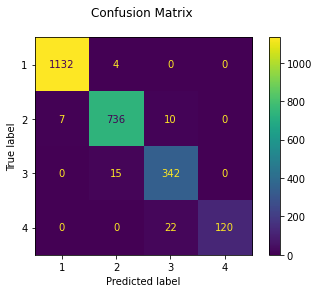

In [170]:
from sklearn import metrics
class_names = data.columns
metrics.plot_confusion_matrix(grid_rf_best, x_test, y_test)
plt.title('Confusion Matrix \n')
plt.show()

## Load and save the model

Now , let's save the model for future use.

In [171]:
import pickle
pickle.dump(grid_rf_best, open("Zomato_Price_range_Classification_model", "wb"))
load_Zomato_Price_range_Classification_model= pickle.load(open("Zomato_Price_range_Classification_model", "rb"))

In [172]:
y_pred = load_Zomato_Price_range_Classification_model.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n= 8)

,Predicted Values,Actual Values
202,1,1
1390,1,1
1899,1,1
2004,2,2
1133,1,1
1584,1,1
1599,3,3
826,1,1


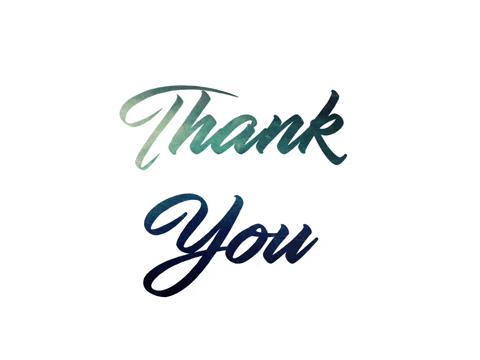